In [ ]:
# Install library
!pip install ultralytics -q

# Cek GPU
!nvidia-smi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.0 MB/s eta 0:00:00
Mon Jul 14 05:28:21 2025       
+-----------------------------------------------------------------------------------------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training Model dengan Dataset Segmentasi V1

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')  # nano model

model.train(
    data='/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v1-segmentasi-tingkat-jeruk.yolov8/data.yaml',
    epochs=1000,              # Lebih panjang karena model kecil perlu lebih banyak belajar
    imgsz=960,               # Resolusi sedang-tinggi bantu deteksi fitur kecil
    batch=32,                # Naikkan ke 32 jika GPU cukup kuat

    # Learning Rate dan Optimizer
    optimizer='Adam',        # Cepat dan stabil
    lr0=0.0003,              # Lebih kecil dari default, aman untuk model kecil
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    cos_lr=True,             # Cosine decay biar stabil

    # Augmentasi Data (super penting untuk model kecil)
    augment=True,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.001,
    flipud=0.1,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.2,
    copy_paste=0.2,
    erasing=0.4,

    # Lainnya
    cache=True,
    patience=50,
    pretrained=True,
    device=0,

    save=True,
    project='v1_yolov8n_tingkat_kebusukan_buah_jeruk',
    name='yolov8n_optimized',
    exist_ok=True
)

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v1-segmentasi-tingkat-jeruk.yolov8/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1000, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=960, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0003, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=0.5, multi_scale=False, name=yolov8n_optimized, nbs=64, nms=False, opset=None, optimize=Fal

100%|██████████| 755k/755k [00:00<00:00, 14.6MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 66.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.2±0.1 MB/s, size: 31.3 KB)


train: Scanning /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v1-segmentasi-tingkat-jeruk.yolov8/train/labels.cache... 493 images, 1 backgrounds, 0 corrupt: 100%|██████████| 493/493 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.3GB RAM): 100%|██████████| 493/493 [00:01<00:00, 378.00it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.0±0.4 ms, read: 0.1±0.1 MB/s, size: 28.8 KB)


val: Scanning /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v1-segmentasi-tingkat-jeruk.yolov8/valid/labels.cache... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 141/141 [00:01<00:00, 103.02it/s]


Plotting labels to v1_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/labels.jpg... 
optimizer: Adam(lr=0.0003, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to v1_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      9.15G      3.211      4.236      4.047         32        960: 100%|██████████| 16/16 [00:05<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all        141        169     0.0036      0.899    0.00402    0.00124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      11.4G      2.715      3.683      3.597         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all        141        169    0.00449      0.893     0.0123    0.00637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      11.4G      2.462      3.317      3.363         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all        141        169    0.00617      0.881     0.0847     0.0322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      11.4G      2.297      3.149      3.265         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all        141        169    0.00803      0.848      0.181     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      11.4G      2.118      2.987       3.12         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169     0.0107      0.841      0.229      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      11.4G      2.055      2.838      2.977         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169     0.0123      0.847      0.226     0.0767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      11.5G      2.042      2.741      2.927         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        141        169       0.18      0.646       0.25     0.0977



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      11.5G      1.892      2.641      2.844         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169     0.0227      0.858      0.141     0.0545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      11.5G      1.825      2.538      2.726         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        141        169      0.494      0.271      0.269      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      11.5G      1.808      2.455      2.666         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.375       0.51      0.367      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      11.5G      1.791      2.496      2.664         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169       0.41      0.614      0.411      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      11.6G      1.691      2.399      2.594         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.475      0.654      0.517      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      11.6G      1.679      2.365      2.508         34        960: 100%|██████████| 16/16 [00:03<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.497      0.632      0.546      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      11.6G      1.645       2.36      2.495         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.478      0.701      0.534      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      11.6G      1.584      2.273      2.431         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all        141        169      0.462      0.583      0.508      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      11.6G      1.557      2.241      2.374         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.566      0.662      0.548       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      11.6G      1.537      2.211      2.345         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.467       0.68      0.544      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      11.6G      1.508      2.191      2.352         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all        141        169      0.547      0.615      0.603      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      11.6G      1.468      2.079      2.256         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169      0.491      0.638      0.596      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      11.6G      1.442      2.068      2.224         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all        141        169      0.619      0.676      0.634      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      11.6G       1.43      2.033      2.244         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        141        169      0.571      0.614      0.643        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      11.6G      1.441      2.052       2.26         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169       0.61      0.635      0.621      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      11.6G      1.377      2.024      2.201         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.633      0.684      0.636      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      11.6G      1.347      1.929      2.123         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all        141        169      0.628      0.651       0.64      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      11.6G      1.352       1.94      2.142         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.547      0.717      0.683      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      11.6G        1.3       1.91      2.108         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        141        169      0.684      0.682      0.657       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      11.6G      1.287      1.867       2.09         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all        141        169      0.591      0.661       0.68      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      11.6G        1.3      1.899      2.088         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169       0.67      0.684      0.665      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      11.6G      1.235      1.809      2.039         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.626      0.632      0.648      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      11.6G      1.259      1.807      2.013         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.715       0.71      0.739      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      11.6G       1.21      1.795      1.961         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.678      0.723      0.731      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      11.6G      1.183      1.751       1.99         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169        0.7      0.676      0.739      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      11.6G      1.235      1.776      1.987         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


                   all        141        169      0.664      0.735      0.716      0.604

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      11.6G      1.161      1.728      1.942         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        141        169      0.638      0.682      0.707      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      11.6G       1.15      1.659       1.93         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.678       0.72      0.759      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      11.6G      1.145      1.702       1.95         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.681       0.68      0.707      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      11.6G       1.18      1.777      1.982         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169       0.73      0.678      0.737      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      11.6G      1.118      1.657      1.897         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        141        169       0.59       0.79      0.692      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      11.6G      1.131      1.675      1.893         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.666        0.7      0.762      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      11.6G      1.059      1.603      1.835         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all        141        169       0.71      0.663      0.743      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      11.6G       1.05      1.605      1.857         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all        141        169      0.656      0.664      0.733       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      11.6G      1.048      1.575      1.825         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.823      0.621      0.741      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      11.6G      1.059      1.561      1.825         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169       0.79      0.665      0.775      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      11.6G      1.049      1.579      1.834         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all        141        169      0.738      0.694      0.775       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      11.6G       1.04      1.573      1.802         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


                   all        141        169      0.643        0.7      0.752      0.591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      11.6G      1.087      1.634      1.852         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.619      0.746      0.769      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      11.6G       1.03      1.554      1.802         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all        141        169      0.747      0.671      0.773      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      11.6G     0.9936      1.503      1.776         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.742      0.692      0.763      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      11.6G      1.007      1.483       1.77         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.641      0.781      0.736      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      11.6G     0.9535        1.5      1.734         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all        141        169        0.7       0.73       0.75      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      11.6G     0.9984      1.494      1.742         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.654      0.763      0.769      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      11.6G     0.9617      1.491      1.741         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.701      0.729      0.771      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      11.6G     0.9761      1.485      1.706         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all        141        169       0.67      0.817      0.784      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      11.6G     0.9783      1.501      1.751         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.665      0.714      0.771      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      11.6G     0.9226      1.425      1.715         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.742       0.76      0.824       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      11.6G     0.9243      1.438       1.71         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all        141        169      0.806      0.722      0.792      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      11.6G     0.9071      1.415      1.655         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all        141        169       0.69      0.666       0.74      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      11.6G     0.9218      1.422      1.708         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.734      0.756      0.797      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      11.6G     0.9042      1.381      1.663         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all        141        169       0.62       0.81      0.765      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      11.6G     0.9066      1.397      1.656         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.765      0.757      0.791       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      11.6G     0.8736      1.393      1.632         20        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        141        169      0.788       0.71      0.828      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      11.6G     0.8822      1.392      1.627         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        141        169      0.768      0.752      0.798      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      11.6G     0.8818      1.376      1.621         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all        141        169      0.685      0.745      0.759      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      11.6G     0.8598       1.38      1.598         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.774      0.728      0.792       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      11.6G     0.8763      1.388      1.599         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169       0.74      0.775      0.833      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      11.6G     0.8281      1.293      1.596         49        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.766      0.746      0.821      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      11.6G     0.9044      1.381      1.637         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.795      0.752      0.814      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      11.6G     0.8473      1.391      1.592         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.772      0.674      0.779      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      11.6G     0.8221      1.344      1.559         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        141        169      0.733      0.778      0.825      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      11.6G     0.8436      1.321       1.57         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all        141        169      0.768      0.757      0.825      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      11.6G     0.8713      1.343      1.631         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all        141        169      0.771      0.776      0.834       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      11.6G       0.87      1.369      1.633         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.743      0.784      0.845      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      11.6G     0.8412      1.317      1.582         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.777      0.781      0.835       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      11.6G     0.8018      1.305      1.544         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.652      0.816      0.837      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      11.6G     0.7936      1.287      1.563         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all        141        169       0.76      0.806      0.831      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      11.6G     0.8244      1.285      1.551         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all        141        169      0.716      0.765      0.824       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      11.6G     0.8107      1.297      1.549         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.737      0.741      0.821      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      11.6G     0.8016      1.278      1.547         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.831      0.746      0.859      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      11.6G     0.8457      1.331      1.577         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        141        169      0.831      0.738      0.846      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      11.6G     0.8042      1.258      1.557         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.788      0.755      0.817      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      11.6G     0.7976      1.262      1.524         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.811      0.775      0.844      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      11.6G     0.8355        1.3      1.576         87        960:  56%|█████▋    | 9/16 [00:01<00:01,  4.83it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
    82/1000      11.6G      0.838      1.311      1.553         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.763      0.804      0.846      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      11.6G     0.7527       1.22      1.509         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all        141        169      0.822      0.762      0.852      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      11.6G     0.7498      1.213      1.496         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.807      0.768      0.846      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      11.6G     0.8081      1.239      1.516         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        141        169      0.735      0.751      0.814      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      11.6G     0.7959      1.266      1.542         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.871      0.779      0.894      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      11.6G     0.7689      1.221      1.518         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        141        169      0.816      0.735       0.85      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      11.6G     0.7552      1.158      1.486         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        141        169      0.724      0.811      0.862      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      11.6G     0.7724      1.176      1.498         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.699       0.83      0.859      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      11.6G     0.7731      1.232      1.509         61        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all        141        169      0.761      0.751      0.832      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      11.6G     0.7631      1.248      1.496         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.717      0.815       0.85      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      11.6G     0.7571      1.181      1.493         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.757      0.845      0.858      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      11.6G     0.7787      1.187      1.521         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        141        169        0.8      0.771      0.861      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      11.6G     0.7542      1.187      1.507         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        141        169      0.821      0.802      0.898      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      11.6G     0.7662      1.203      1.491         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169       0.84      0.773      0.869      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      11.6G     0.7785      1.188      1.503         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.821      0.822      0.883      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      11.6G     0.7384      1.142      1.468         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all        141        169      0.763      0.784      0.858      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      11.6G     0.7405      1.161      1.478         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.795      0.817      0.899      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      11.6G     0.7237      1.129      1.439         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        141        169      0.753      0.775      0.875      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      11.6G     0.7403      1.143      1.449         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all        141        169        0.8      0.789      0.887      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      11.6G     0.7321      1.171      1.458         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.743      0.818      0.835      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      11.6G     0.7242      1.159      1.457         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


                   all        141        169      0.828      0.781      0.871      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      11.6G     0.7509      1.149      1.472         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.768      0.807      0.889       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      11.6G     0.7402      1.152      1.455         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.727      0.867      0.895      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      11.6G     0.7519      1.195      1.481         32        960: 100%|██████████| 16/16 [00:03<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.727      0.882      0.912      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      11.6G     0.7214       1.14      1.441         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.792      0.739      0.868      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      11.6G      0.724      1.133      1.449         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        141        169      0.834      0.785      0.879      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      11.6G     0.7299      1.125      1.475         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        141        169      0.838      0.807      0.896      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      11.6G     0.7094      1.097       1.42         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.855      0.836      0.906      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      11.6G     0.7166      1.115      1.443         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.812      0.834      0.895      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      11.6G     0.7444      1.105      1.465         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all        141        169      0.882      0.817      0.902      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      11.6G     0.6999      1.124      1.412         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.853      0.813      0.911      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      11.6G     0.7444      1.152       1.47         53        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.838      0.794      0.889       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      11.6G     0.7227      1.104      1.413         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        141        169      0.872       0.77      0.869      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      11.6G     0.7023      1.117      1.425         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.826      0.815      0.901      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      11.6G     0.6946      1.082      1.415         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.849      0.777      0.874      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      11.6G     0.6747      1.067       1.39         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        141        169      0.783      0.826      0.896      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      11.6G     0.7053      1.073      1.424         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.862      0.861      0.913      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      11.6G     0.6941      1.052       1.41         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all        141        169       0.78      0.799      0.901      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      11.6G     0.7002      1.075      1.422         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.892      0.771      0.899       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      11.6G     0.7177        1.1      1.399         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all        141        169      0.884      0.791      0.897      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      11.6G     0.7131      1.111      1.433         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.845      0.867      0.913      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      11.6G     0.6853      1.093      1.405         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        141        169        0.8      0.841        0.9      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      11.6G     0.6931       1.07      1.399         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all        141        169      0.896      0.759      0.898      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      11.6G      0.694      1.083      1.415         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


                   all        141        169       0.85      0.817      0.903      0.844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      11.6G     0.6759      1.072      1.404         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.903      0.766      0.906      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      11.6G      0.642      1.075      1.351         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169       0.84      0.848      0.912      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      11.6G     0.6851      1.091      1.406         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.806      0.847      0.894      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      11.6G     0.6683      1.034      1.373         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.873       0.86      0.937      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      11.6G     0.6749      1.036      1.392         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.805       0.86      0.899      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      11.6G     0.7029      1.058      1.412         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.852      0.826      0.897      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      11.6G     0.7092      1.063      1.397         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.878      0.784      0.889      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      11.6G     0.6764      1.007      1.398         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all        141        169      0.854      0.723      0.885       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      11.6G     0.6717      1.017      1.397         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all        141        169      0.908      0.775      0.912      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      11.6G      0.689      1.059      1.401         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.847      0.845      0.922      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000      11.6G     0.6659       1.01      1.382         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169      0.864      0.834      0.908      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      11.6G     0.6845      1.051      1.388         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169      0.866      0.813      0.919       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      11.6G     0.6683     0.9943      1.376         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all        141        169      0.864      0.861       0.93      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      11.6G     0.6717      1.007      1.369         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.897      0.836       0.93      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      11.6G     0.6606      1.024      1.377         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        141        169      0.793       0.89      0.906      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      11.6G     0.6937      1.069      1.391         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.838      0.796      0.898      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      11.6G     0.6779      1.056      1.393         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.791      0.835       0.92      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      11.6G       0.65      1.002      1.367         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.891      0.793      0.919      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      11.6G     0.6751      1.038      1.365         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.865      0.854      0.923      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      11.6G     0.6585      1.028       1.36         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.904       0.79      0.922      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      11.6G     0.6772      1.027      1.398         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all        141        169      0.832       0.89      0.915      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      11.6G     0.6724       1.04      1.371         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all        141        169      0.791      0.842      0.902      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      11.6G     0.6234     0.9698      1.332         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.821      0.805      0.908      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      11.6G     0.6467      1.014      1.353         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169       0.75      0.853      0.912      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      11.6G     0.6744      1.024      1.387         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.817      0.869      0.914      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      11.6G     0.6653     0.9974       1.38         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all        141        169      0.909       0.87      0.936      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      11.6G     0.6937       1.03      1.403         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        141        169      0.851      0.839      0.917      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      11.6G       0.64     0.9882      1.342         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.871      0.834      0.921      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      11.6G     0.6189     0.9784      1.324         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all        141        169      0.908      0.855      0.942      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      11.6G     0.6595     0.9942      1.359         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.935      0.823      0.934      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      11.6G     0.6494     0.9788      1.354         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.926      0.786      0.916      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      11.6G     0.6598      1.029      1.346         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169      0.871      0.854      0.929      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      11.6G     0.6395      1.005       1.34         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.873      0.844      0.931      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      11.6G     0.6505     0.9771      1.348         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.939      0.831      0.936      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      11.6G     0.6614      1.041      1.365         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


                   all        141        169       0.84      0.882      0.928      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      11.6G     0.6331     0.9929      1.347         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all        141        169      0.853      0.833      0.915      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      11.6G     0.6431      1.022      1.367         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        141        169      0.883      0.827      0.922      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      11.6G     0.6823      1.045       1.38         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.935      0.841      0.927      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      11.6G     0.6133     0.9388      1.318         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.849      0.895      0.938      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      11.6G     0.6513      0.983       1.35         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.869      0.761      0.908      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      11.6G     0.6783      1.029       1.39         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all        141        169       0.87      0.835      0.935      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      11.6G      0.626     0.9579      1.335         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.942      0.833      0.935      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      11.6G     0.6207     0.9788      1.324         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.882      0.841      0.932      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      11.6G     0.6112     0.9457      1.336         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.886      0.859      0.935      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      11.6G     0.6524     0.9718      1.355         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.909      0.852       0.94      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      11.6G     0.6393     0.9515       1.34         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        141        169      0.912      0.811      0.928      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      11.6G     0.6098     0.9326      1.314         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all        141        169      0.918      0.821      0.924      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      11.6G     0.6533     0.9717      1.355         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169       0.89      0.839      0.925      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      11.6G     0.6327     0.9332      1.331         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.898      0.832      0.931      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      11.6G     0.6305     0.9657      1.333         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.893      0.831      0.924       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      11.6G     0.6232     0.9249      1.319         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.835      0.903      0.938      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      11.6G     0.6232     0.9798      1.325         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all        141        169      0.942      0.848      0.924      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      11.6G     0.5932     0.9404      1.304         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.916      0.852      0.945       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      11.6G     0.6299     0.9236      1.328         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.906      0.868      0.943      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      11.6G     0.6329     0.9326      1.353         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]


                   all        141        169      0.915      0.868      0.938      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      11.6G     0.6299     0.9648      1.336         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169       0.87      0.879      0.931      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      11.6G     0.6386      0.986      1.343         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.892      0.829      0.948      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      11.6G      0.624     0.9417      1.325         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.899      0.862      0.952      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      11.6G     0.6472     0.9536      1.348         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169       0.95      0.843      0.941      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      11.6G     0.6175     0.9781      1.327         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.909      0.872      0.945      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      11.6G     0.6113     0.9326      1.319         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        141        169        0.9      0.882      0.953      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      11.6G     0.6152     0.9445      1.322         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all        141        169       0.84      0.902      0.949      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      11.6G     0.6534      1.017      1.359         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        141        169      0.877      0.849      0.938      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      11.6G     0.6247     0.9339      1.328         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.828      0.889      0.938      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      11.6G     0.6048     0.9613      1.294         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.864      0.885      0.939      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      11.6G     0.6361     0.9483      1.331         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.886      0.849      0.918      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      11.6G     0.5948     0.9018      1.301         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.894      0.875      0.938      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      11.6G     0.6167     0.9071      1.313         33        960: 100%|██████████| 16/16 [00:03<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.894       0.85      0.936      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      11.6G     0.6245     0.9505      1.317         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]


                   all        141        169      0.945      0.864       0.94       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      11.6G     0.6244      0.908      1.328         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.823      0.871      0.935      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      11.6G     0.5886     0.8851      1.282         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.824      0.883      0.937      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      11.6G     0.6165     0.9246      1.307         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.956      0.868      0.958      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      11.6G     0.6168     0.9442      1.328         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.921      0.886      0.949      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      11.6G      0.623     0.9161      1.317         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.916       0.78      0.895      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      11.6G     0.5743     0.8608      1.284         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169      0.848      0.848      0.932      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      11.6G     0.5861     0.9023      1.295         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.894      0.775       0.92      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      11.6G     0.6058     0.9082      1.279         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169       0.87      0.854      0.935      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      11.6G     0.5901     0.9144      1.296         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        141        169      0.956      0.834      0.947      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      11.6G     0.5958     0.9102      1.301         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all        141        169      0.887      0.878      0.953      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      11.6G     0.6094     0.9064       1.31         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.888      0.818      0.937      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      11.6G     0.6067     0.9202      1.298         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.914      0.853      0.933      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      11.6G     0.5915     0.8833      1.287         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.909      0.866      0.932      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      11.6G     0.5677     0.8569       1.28         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.915      0.846      0.948       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      11.6G     0.5985     0.9389      1.303         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.915      0.879      0.946      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      11.6G     0.6071     0.9419       1.31         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.853      0.854      0.937      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      11.6G     0.5968     0.9008      1.293         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all        141        169      0.948       0.87      0.952        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      11.6G     0.6106     0.9436      1.305         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169       0.85      0.869      0.923      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      11.6G      0.594     0.9131      1.276         36        960: 100%|██████████| 16/16 [00:03<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.917      0.856      0.946       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      11.6G     0.6239     0.9248      1.346         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


                   all        141        169       0.95       0.86      0.957      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      11.6G     0.5983     0.9233      1.296         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all        141        169      0.922      0.866      0.952      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      11.6G     0.5978     0.9481      1.279         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all        141        169      0.878      0.815      0.924      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      11.6G     0.5966     0.9017      1.288         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.854      0.908       0.93      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      11.6G     0.5955      0.893      1.294         98        960:  75%|███████▌  | 12/16 [00:02<00:00,  4.49it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
   218/1000      11.6G     0.5828     0.8944      1.284         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        141        169      0.842      0.832      0.914      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000      11.6G     0.5849     0.8741      1.292         45        960: 100%|██████████| 16/16 [00:03<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.889      0.933      0.949      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      11.6G     0.5955     0.9131       1.28         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all        141        169      0.872      0.868      0.936      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      11.6G     0.5941      0.911      1.316         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        141        169      0.855      0.872      0.939      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      11.6G     0.5975     0.8988      1.301         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all        141        169      0.939      0.843      0.943      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      11.6G     0.5549     0.8632       1.25         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.896      0.914      0.957      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      11.6G     0.5757     0.8816      1.278         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.844      0.906       0.95      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      11.6G      0.596     0.8603      1.306         50        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]

                   all        141        169      0.902      0.893      0.951      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      11.6G     0.5952     0.9113      1.287         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        141        169       0.87      0.937       0.95      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      11.6G     0.5869     0.8842      1.281         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169        0.9       0.87      0.942      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      11.6G     0.5895     0.8832      1.272         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.928      0.854      0.946      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      11.6G     0.5893     0.8857      1.291         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169       0.93      0.847       0.95        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      11.6G     0.5726     0.8752      1.272         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.893      0.855      0.956      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      11.6G     0.6038     0.8858      1.292         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.939       0.84      0.942      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      11.6G     0.6091     0.9031      1.293         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.898      0.827       0.95      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      11.6G     0.5773     0.8496      1.269         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169       0.91      0.848      0.946      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      11.6G     0.5763     0.8634      1.272         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.928      0.859      0.942      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      11.6G     0.5797     0.8771      1.272         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.871      0.891      0.949      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      11.6G     0.5773     0.8478      1.266         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all        141        169       0.88      0.882      0.945      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      11.6G     0.5605       0.85      1.272         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all        141        169      0.819      0.908       0.94      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      11.6G      0.584     0.8591      1.286         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.882      0.869       0.94      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000      11.6G     0.5888     0.9091      1.275         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.892      0.891      0.942      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      11.6G     0.5846     0.8514       1.28         25        960: 100%|██████████| 16/16 [00:03<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all        141        169      0.931      0.874      0.943      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      11.6G     0.5933     0.8781      1.284         55        960: 100%|██████████| 16/16 [00:03<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.922       0.87      0.951      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      11.6G     0.5871     0.8625      1.285         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169       0.85      0.906      0.952      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      11.6G     0.5935     0.8805        1.3         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        141        169        0.9      0.869      0.956      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      11.6G     0.6124     0.9173       1.32         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.857      0.866      0.938      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      11.6G     0.5572     0.8362      1.267         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all        141        169      0.848      0.854      0.951      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      11.6G     0.5752     0.8433       1.24         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all        141        169       0.85      0.925      0.958      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      11.6G     0.5589     0.8832      1.282         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all        141        169      0.915      0.825      0.949      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      11.6G      0.545     0.8396      1.239         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.906      0.876      0.939      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000      11.6G     0.5852     0.8439      1.292         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all        141        169      0.925      0.853      0.956      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000      11.6G     0.5806     0.8926      1.285         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.956      0.866      0.962      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      11.6G      0.566     0.8488      1.265         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.935      0.894       0.96      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000      11.6G     0.5641     0.8669      1.262         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all        141        169      0.884      0.916      0.959      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000      11.6G     0.5941     0.8783      1.279         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.955      0.885      0.966      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000      11.6G     0.5834     0.8649      1.278         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.836      0.907       0.95       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      11.6G      0.569     0.8725      1.266         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.831      0.905      0.948      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      11.6G     0.5727     0.8469      1.274         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.951      0.854      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      11.6G     0.5773     0.8548      1.274         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.882      0.908      0.958      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      11.6G     0.5794     0.8607      1.287         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.947      0.847      0.946      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      11.6G     0.5813     0.8454       1.29         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all        141        169        0.9      0.865      0.942      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      11.6G      0.591     0.8598      1.287         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.899      0.877      0.933       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      11.6G     0.5539     0.8185      1.262         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.895      0.823      0.936      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      11.6G     0.5819     0.8698      1.293         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.873      0.876      0.946      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      11.6G     0.5655      0.818      1.247         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        141        169      0.942      0.811      0.931      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      11.6G     0.5507     0.8127      1.244         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.909      0.908      0.951      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      11.6G     0.5586     0.8628      1.259         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169       0.93       0.85      0.947      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      11.6G     0.5246     0.8058      1.242         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all        141        169      0.944      0.851      0.953      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      11.6G     0.5472     0.8288      1.252         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.921      0.865      0.957      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      11.6G     0.5611       0.83      1.257         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.909      0.891      0.956      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      11.6G     0.5884     0.8584      1.288         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.848      0.898      0.949      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      11.6G     0.5841     0.8464      1.285         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.961       0.83      0.954      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      11.6G     0.5831     0.8316      1.273         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169       0.87      0.892      0.956      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000      11.6G     0.5674     0.8742      1.268         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        141        169      0.859      0.867      0.948        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      11.6G     0.5677     0.8437      1.263         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.878      0.917      0.959      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      11.6G     0.5601     0.8165      1.278         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all        141        169      0.902      0.893      0.967      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      11.6G     0.5368     0.8209      1.226         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169       0.92      0.899      0.958      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      11.6G     0.5905     0.8773       1.27         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all        141        169      0.904      0.894      0.957      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      11.6G     0.5389     0.7933      1.236         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.889      0.906      0.966      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      11.6G     0.5494     0.8379      1.254         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.937      0.943       0.97      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000      11.6G     0.5551     0.8459      1.255         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.894      0.907      0.959      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      11.6G     0.5856     0.8429      1.264         49        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169      0.915      0.869      0.958      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      11.6G     0.5598     0.8241      1.255         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.901      0.875      0.961      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      11.6G     0.5639     0.8521      1.263         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.856      0.912      0.945      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      11.6G     0.5621     0.8211       1.25         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all        141        169      0.916      0.908      0.958      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      11.6G     0.5624     0.8098      1.273         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.936      0.862      0.957       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000      11.6G     0.5744     0.8614      1.278         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all        141        169      0.872      0.939      0.957      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000      11.6G     0.5507     0.8019      1.243         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        141        169      0.923      0.893      0.949      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      11.6G     0.5564     0.8138      1.247         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.906      0.911      0.956      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000      11.6G      0.564     0.8143      1.268         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.923      0.887      0.949      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000      11.6G     0.5566     0.8353      1.251         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all        141        169      0.899       0.87      0.951      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000      11.6G     0.5739     0.8139      1.282         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169        0.9      0.909      0.965      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      11.6G     0.5772     0.8375       1.28         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169       0.88      0.909      0.955      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/1000      11.6G     0.5475     0.8001      1.243         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.912      0.891      0.951      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      11.6G     0.5815     0.8428       1.28         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.869      0.914      0.945      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      11.6G     0.5647     0.8241       1.27         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169       0.94      0.887       0.96      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      11.6G     0.5676     0.8273      1.259         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.886       0.88      0.963       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/1000      11.6G     0.5428       0.82      1.245         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.884      0.891      0.961      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      11.6G     0.5554      0.855      1.251         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all        141        169      0.885      0.859      0.956      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/1000      11.6G     0.5753      0.911      1.271         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.862       0.87      0.949      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      11.6G     0.5423     0.8372       1.25         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169      0.878      0.907      0.958       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      11.6G     0.5305     0.7998      1.225         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.903      0.869       0.96       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/1000      11.6G      0.558     0.8502      1.244         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.926      0.894      0.957      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      11.6G     0.5594     0.8491      1.251         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.922      0.895      0.952      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      11.6G     0.5528      0.822       1.24         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.942      0.882      0.952       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/1000      11.6G     0.5527     0.8095      1.249         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.936      0.895      0.959      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      11.6G      0.551     0.8098      1.233         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.941      0.913      0.961      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      11.6G     0.5325     0.8013      1.228         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        141        169      0.939      0.885      0.953      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/1000      11.6G     0.5384     0.8233      1.237         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]


                   all        141        169      0.938      0.902      0.965      0.918

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/1000      11.6G     0.5482     0.8199      1.257         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all        141        169      0.939      0.915      0.966       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/1000      11.6G     0.5787     0.8225      1.269         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.925      0.924      0.962      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/1000      11.6G     0.5542     0.8033      1.262         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all        141        169      0.932       0.91      0.967      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/1000      11.6G     0.5564      0.788      1.241         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.918      0.901      0.967      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/1000      11.6G     0.5124     0.7914      1.215         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169       0.87      0.904      0.958      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/1000      11.6G     0.5366     0.7918      1.238         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.821      0.927       0.96      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/1000      11.6G     0.5439     0.8081      1.242         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.879      0.944      0.966      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      11.6G      0.572     0.8429       1.27         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.882      0.938      0.963      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      11.6G       0.57     0.8393      1.256         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.932      0.889      0.966      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      11.6G     0.5452     0.8128      1.249         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        141        169      0.915      0.885      0.958      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      11.6G     0.5418     0.7972      1.236         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.916      0.926      0.959      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      11.6G     0.5404     0.8063      1.247         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        141        169      0.961      0.905      0.958      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      11.6G     0.5488     0.8213      1.241         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        141        169      0.935      0.894      0.955      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      11.6G     0.5746     0.8418      1.276         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all        141        169      0.903      0.944      0.965      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      11.6G     0.5385     0.8202      1.247         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.931      0.915      0.962      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      11.6G      0.546     0.8307      1.236         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all        141        169      0.888      0.922      0.961      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/1000      11.6G     0.5641     0.8269      1.257         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.972      0.883      0.964      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/1000      11.6G     0.5425     0.8016      1.234         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        141        169      0.909      0.906      0.964      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/1000      11.6G     0.5671     0.8319      1.251         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all        141        169      0.953      0.902      0.967      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/1000      11.6G     0.5548     0.8152      1.252         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169       0.93      0.871      0.962      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      11.6G     0.5522     0.7961      1.247         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.938      0.925      0.966      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      11.6G     0.5547     0.7942      1.254         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.953      0.892      0.959      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      11.6G     0.5573     0.8171      1.264         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        141        169      0.933      0.896      0.959      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      11.6G     0.5264     0.7858      1.231         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.913      0.914      0.965      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      11.6G     0.5633     0.8025      1.244         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.939        0.9      0.968      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      11.6G     0.5711     0.8343      1.249         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.931      0.891      0.964      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      11.6G     0.5403     0.7629      1.237         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        141        169      0.946      0.855      0.952      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      11.6G     0.5517     0.7727      1.241         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.912      0.871      0.942       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      11.6G     0.5304     0.7792      1.238         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.922      0.911      0.966      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/1000      11.6G     0.5349     0.7822      1.247         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all        141        169      0.889      0.884      0.944      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      11.6G     0.5278      0.781      1.235         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.936      0.873      0.964       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      11.6G     0.5437     0.7741      1.236         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all        141        169      0.901       0.91      0.957      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      11.6G     0.5335     0.7901      1.226         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all        141        169      0.939      0.897      0.969      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      11.6G     0.5574     0.7945      1.253         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.867      0.939      0.966      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      11.6G     0.5561     0.7766      1.241         90        960:  94%|█████████▍| 15/16 [00:03<00:00,  4.72it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
   342/1000      11.6G     0.5506     0.7775      1.238         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.906      0.893      0.958      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      11.6G     0.5543     0.8005      1.245         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.892      0.909      0.952      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/1000      11.6G     0.5393      0.807      1.217         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.951      0.884      0.949      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/1000      11.6G     0.5291      0.801      1.221         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.939      0.902      0.957      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/1000      11.6G     0.5235      0.762      1.218         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.953      0.893      0.964      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      11.6G     0.5143     0.7523      1.217         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169       0.92      0.897      0.964      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/1000      11.6G     0.5435     0.7948      1.234         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169       0.87      0.931      0.961      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/1000      11.6G     0.5488     0.8224      1.247         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        141        169       0.88      0.915      0.956      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      11.6G     0.5615     0.8173      1.258         49        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.901      0.927      0.967      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      11.6G     0.5199     0.8114      1.207         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.907       0.91      0.965      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/1000      11.6G     0.5384     0.7927      1.229         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.921      0.925      0.972      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      11.6G     0.5154     0.7742      1.205         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169       0.92      0.926      0.968      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      11.6G     0.5359     0.7595      1.235         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.957        0.9      0.964      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/1000      11.6G     0.5481     0.8079      1.236         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all        141        169      0.894      0.909      0.964      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      11.6G     0.5328     0.7802      1.223         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.922      0.853       0.95      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      11.6G     0.5387     0.7772      1.243         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all        141        169      0.912      0.915      0.967      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      11.6G     0.5355     0.7716       1.23         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all        141        169      0.922      0.909      0.968      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   359/1000      11.6G     0.5272     0.7788       1.22         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.927      0.934      0.968      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   360/1000      11.6G     0.5258      0.794      1.234         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all        141        169       0.93      0.935      0.968      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   361/1000      11.6G     0.5148     0.7817      1.199         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.941      0.916      0.964      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   362/1000      11.6G     0.5517      0.799      1.232         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.928      0.903       0.96      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   363/1000      11.6G     0.5402     0.7497      1.225         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.951      0.919      0.961      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   364/1000      11.6G     0.5419     0.7835      1.239         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.964       0.89      0.962      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   365/1000      11.6G     0.5185     0.7478      1.197         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all        141        169      0.961      0.894      0.957      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   366/1000      11.6G     0.5332     0.7992      1.216         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.925      0.896      0.957      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   367/1000      11.6G     0.5207     0.7893      1.212         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.917        0.9      0.975      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   368/1000      11.6G     0.5242     0.7901      1.223         55        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.852      0.921      0.969      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   369/1000      11.6G     0.5054     0.7264      1.197         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.897      0.932       0.97      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   370/1000      11.6G     0.5363     0.7554      1.227         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all        141        169       0.95      0.848      0.965      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   371/1000      11.6G     0.5355     0.7791      1.234         54        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.904      0.912      0.966       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   372/1000      11.6G     0.5118     0.7511      1.231         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.913      0.886      0.958       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   373/1000      11.6G      0.528     0.7838      1.251         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.928      0.876      0.957      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   374/1000      11.6G     0.5242     0.7634      1.217         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        141        169      0.932      0.916      0.961      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   375/1000      11.6G     0.5126      0.741      1.202         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.957      0.889      0.964      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   376/1000      11.6G     0.5265     0.7815      1.224         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all        141        169      0.904      0.932      0.972      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   377/1000      11.6G     0.5197     0.7444      1.207         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all        141        169      0.896      0.897      0.971      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   378/1000      11.6G     0.5539     0.7766       1.23         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169        0.9      0.938      0.972      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   379/1000      11.6G     0.5311     0.7588      1.222         43        960: 100%|██████████| 16/16 [00:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all        141        169      0.954      0.899       0.97      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   380/1000      11.6G     0.5484     0.8113      1.259         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        141        169      0.952      0.931      0.972      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   381/1000      11.6G     0.5298     0.7749      1.215         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all        141        169      0.925      0.932      0.972      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   382/1000      11.6G     0.5018     0.7395      1.193         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.891      0.936      0.966      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   383/1000      11.6G     0.5196     0.7451      1.219         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        141        169      0.896      0.903      0.961      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   384/1000      11.6G      0.526     0.7701      1.218         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.903      0.903      0.961      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   385/1000      11.6G     0.5167     0.7561      1.219         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.931      0.923      0.963      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   386/1000      11.6G     0.5241     0.7912      1.223         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169      0.957      0.882      0.966      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   387/1000      11.6G     0.5317     0.7692      1.225         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.921      0.887      0.963      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   388/1000      11.6G     0.5397     0.7942      1.226         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.938      0.908      0.959      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   389/1000      11.6G     0.5353     0.7592      1.228         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.932      0.913      0.961      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   390/1000      11.6G     0.5032     0.7505      1.205         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.939      0.923      0.969      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   391/1000      11.6G     0.5195     0.7545      1.211         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.971      0.917      0.974      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   392/1000      11.6G     0.5069     0.7453      1.209         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.946      0.903      0.966      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   393/1000      11.6G     0.5126      0.735      1.217         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.924      0.888      0.954       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   394/1000      11.6G     0.5724     0.8358      1.264         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.959      0.884      0.967      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   395/1000      11.6G     0.5029      0.727      1.182         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.898      0.933      0.967      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   396/1000      11.6G     0.5197     0.7595      1.225         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169       0.94      0.906      0.968      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   397/1000      11.6G     0.5309     0.7812      1.228         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all        141        169      0.954      0.913      0.965      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   398/1000      11.6G     0.5109     0.7189      1.202         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all        141        169      0.896      0.937      0.969      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   399/1000      11.6G     0.5384     0.7739      1.217         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169       0.89      0.927      0.972      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   400/1000      11.6G     0.5078     0.7496      1.199         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169        0.9       0.92      0.973      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   401/1000      11.6G     0.5062     0.7049      1.197         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.935      0.929      0.965       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   402/1000      11.6G     0.5544     0.7722       1.24         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.956      0.888      0.964      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   403/1000      11.6G     0.5251     0.7647       1.22         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        141        169      0.928      0.921      0.967      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   404/1000      11.6G     0.5235     0.7534      1.236         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169       0.95      0.909       0.97      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   405/1000      11.6G     0.5197     0.7526       1.23         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.964      0.916      0.969      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   406/1000      11.6G     0.5034     0.7293       1.21         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        141        169      0.948      0.901      0.964      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   407/1000      11.6G     0.5118     0.7389      1.214         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.931      0.896      0.961      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   408/1000      11.6G     0.5276     0.7369      1.237         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.939      0.907      0.965      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   409/1000      11.6G      0.566     0.7963      1.265         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.926      0.901      0.963      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   410/1000      11.6G     0.5206     0.7372      1.212         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.931      0.919      0.966      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   411/1000      11.6G     0.5493     0.8138      1.245         49        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.917      0.901      0.958      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   412/1000      11.6G      0.517     0.7762      1.203         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all        141        169      0.907      0.921      0.962       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   413/1000      11.6G     0.5199      0.745      1.217         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all        141        169      0.934      0.895      0.962      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   414/1000      11.6G     0.5239     0.7908      1.227         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all        141        169      0.923      0.913      0.966      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   415/1000      11.6G      0.506     0.7263      1.208         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.949      0.918      0.972      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   416/1000      11.6G      0.497     0.7509      1.202         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all        141        169       0.95      0.928      0.975      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   417/1000      11.6G     0.5193     0.7496      1.198         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        141        169      0.948      0.914      0.969      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   418/1000      11.6G     0.5182     0.7384      1.218         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.957      0.906      0.968      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   419/1000      11.6G     0.4968      0.708      1.191         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169       0.96      0.896      0.965      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   420/1000      11.6G     0.5019     0.7159      1.201         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all        141        169      0.956      0.905      0.967      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   421/1000      11.6G     0.5297      0.733      1.226         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.957      0.926      0.976      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   422/1000      11.6G     0.5133     0.7346      1.216         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all        141        169      0.949      0.927      0.975       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   423/1000      11.6G     0.5066     0.7203      1.199         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.949      0.922      0.971       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   424/1000      11.6G     0.5018     0.7348      1.208         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169       0.95      0.907      0.972       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   425/1000      11.6G     0.5137      0.728        1.2         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.942      0.925      0.971      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   426/1000      11.6G     0.4993     0.7144      1.191         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.948      0.897      0.965      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   427/1000      11.6G     0.4889     0.7065      1.188         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.939      0.913      0.961      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   428/1000      11.6G     0.5236     0.7419      1.221         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.919      0.914      0.966      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   429/1000      11.6G     0.5183     0.7508      1.205         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all        141        169      0.945      0.917      0.978      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   430/1000      11.6G     0.5038     0.7276      1.212         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.914      0.943      0.974      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   431/1000      11.6G     0.5108     0.7403      1.212         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.933       0.91      0.967      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   432/1000      11.6G      0.494     0.7023      1.195         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.938      0.928      0.969      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   433/1000      11.6G     0.5174     0.7374      1.204         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.927      0.901      0.972      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   434/1000      11.6G     0.5292     0.7515       1.22         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.964      0.893      0.975      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   435/1000      11.6G     0.4968     0.7162      1.202         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.947      0.923      0.972       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   436/1000      11.6G     0.5115     0.7098      1.211         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all        141        169      0.938      0.925       0.97      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   437/1000      11.6G     0.5184     0.7254      1.207         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        141        169      0.959        0.9      0.967      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   438/1000      11.6G     0.5146     0.7315      1.219         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.947      0.909      0.966      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   439/1000      11.6G     0.5084     0.7402      1.196         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.943      0.912       0.97      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   440/1000      11.6G     0.5124     0.7334      1.219         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]


                   all        141        169      0.935      0.908      0.968       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   441/1000      11.6G     0.4947     0.7119      1.197         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.929      0.923      0.968      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   442/1000      11.6G     0.5048     0.7229      1.215         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.919      0.937      0.972      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   443/1000      11.6G     0.4985     0.7214      1.202         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.944      0.918      0.971      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   444/1000      11.6G     0.5131     0.7174      1.195         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169       0.95      0.925      0.971      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   445/1000      11.6G     0.5103     0.7316      1.211         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.942       0.92      0.973      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   446/1000      11.6G      0.502      0.738      1.202         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.957      0.914      0.968      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   447/1000      11.6G     0.5108     0.7271      1.204         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        141        169      0.937      0.923      0.968      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   448/1000      11.6G     0.5208     0.7129      1.197         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.961        0.9      0.972      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   449/1000      11.6G     0.4889     0.7226      1.172         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.905      0.905      0.965      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   450/1000      11.6G     0.5331     0.7657      1.224         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.911      0.915      0.967      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   451/1000      11.6G     0.5086      0.726       1.21         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.906       0.93      0.967      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   452/1000      11.6G     0.5039      0.744      1.205         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.951      0.919      0.966      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   453/1000      11.6G      0.486      0.704      1.186         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.939      0.938      0.969      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   454/1000      11.6G     0.4906     0.7229       1.19         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all        141        169      0.976      0.889      0.971      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   455/1000      11.6G     0.4886     0.7072      1.177         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.943      0.916      0.968      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   456/1000      11.6G     0.5113     0.7183        1.2         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        141        169      0.935      0.916      0.972       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   457/1000      11.6G     0.5061     0.6919      1.192         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all        141        169      0.923      0.903       0.97      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   458/1000      11.6G     0.4914     0.7034      1.188         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.923      0.903      0.973      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   459/1000      11.6G     0.4986     0.6926      1.184         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.901      0.913       0.97      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   460/1000      11.6G     0.4964     0.7208      1.181         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        141        169      0.936      0.913      0.972      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   461/1000      11.6G     0.5168     0.7297      1.221         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.923       0.93      0.976      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   462/1000      11.6G     0.5101     0.7262      1.195         40        960: 100%|██████████| 16/16 [00:03<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.953      0.903      0.977      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   463/1000      11.6G     0.4878     0.6931      1.167         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.964      0.908      0.977      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   464/1000      11.6G     0.4924     0.7167      1.183         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all        141        169      0.966      0.909      0.979      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   465/1000      11.6G     0.5037     0.7161      1.204         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.962      0.908      0.979      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   466/1000      11.6G     0.5282     0.7356      1.206         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all        141        169      0.936      0.922      0.978      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   467/1000      11.6G     0.4842      0.705      1.184         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.938      0.931      0.977      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   468/1000      11.6G     0.5284     0.7283      1.226         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169      0.934      0.943       0.98      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   469/1000      11.6G     0.4929     0.6762      1.177         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        141        169      0.937      0.927      0.979      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   470/1000      11.6G     0.4991      0.717      1.181         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.946      0.922      0.978      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   471/1000      11.6G     0.5132     0.7559       1.21         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.943      0.923       0.97      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   472/1000      11.6G     0.5202     0.7284      1.213         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all        141        169      0.955      0.927      0.967      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   473/1000      11.6G     0.4987     0.7471      1.189         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.937      0.909       0.97      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   474/1000      11.6G     0.4686      0.662       1.16         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.937      0.931      0.971      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   475/1000      11.6G      0.502     0.7271      1.168         20        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.949      0.905      0.969       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   476/1000      11.6G     0.4807     0.6764      1.178         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169      0.935        0.9      0.969      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   477/1000      11.6G     0.5061     0.6858      1.195         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.924      0.924      0.972      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   478/1000      11.6G     0.5253     0.7182      1.208         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.938      0.931      0.975      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   479/1000      11.6G     0.4618     0.6678      1.151         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.958      0.913      0.974      0.936
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 429, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



479 epochs completed in 0.621 hours.
Optimizer stripped from v1_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/last.pt, 6.4MB
Optimizer stripped from v1_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt, 6.4MB

Validating v1_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]


                   all        141        169       0.94      0.926       0.98       0.94
                matang         44         62      0.966      0.887      0.973       0.91
          sangat_busuk         51         54      0.929      0.967      0.981       0.93
         sedikit_busuk         51         53      0.925      0.925      0.987       0.98
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to v1_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8660170290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
!yolo segment predict model = "/content/v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt" source ="/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/test/images"

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 956, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 79, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 151, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 295, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 1551, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
    

# Training Model dengan Dataset Segmentasi V2

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')  # nano model

model.train(
    data='/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/data.yaml',
    epochs=1000,              # Lebih panjang karena model kecil perlu lebih banyak belajar
    imgsz=960,               # Resolusi sedang-tinggi bantu deteksi fitur kecil
    batch=32,                # Naikkan ke 32 jika GPU cukup kuat

    # Learning Rate dan Optimizer
    optimizer='Adam',        # Cepat dan stabil
    lr0=0.0003,              # Lebih kecil dari default, aman untuk model kecil
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    cos_lr=True,             # Cosine decay biar stabil

    # Augmentasi Data (super penting untuk model kecil)
    augment=True,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.001,
    flipud=0.1,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.2,
    copy_paste=0.2,
    erasing=0.4,

    # Lainnya
    cache=True,
    patience=50,
    pretrained=True,
    device=0,

    save=True,
    project='v2_yolov8n_tingkat_kebusukan_buah_jeruk',
    name='yolov8n_optimized',
    exist_ok=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1000, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hs

100%|██████████| 755k/755k [00:00<00:00, 15.2MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 65.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.7±0.5 ms, read: 0.2±0.1 MB/s, size: 27.9 KB)


train: Scanning /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/train/labels... 491 images, 0 backgrounds, 0 corrupt: 100%|██████████| 491/491 [00:26<00:00, 18.76it/s]


train: New cache created: /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.3GB RAM): 100%|██████████| 491/491 [00:01<00:00, 465.83it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 2.8±2.7 ms, read: 0.2±0.2 MB/s, size: 29.1 KB)


val: Scanning /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/valid/labels... 141 images, 0 backgrounds, 0 corrupt: 100%|██████████| 141/141 [00:06<00:00, 20.65it/s]

val: New cache created: /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 141/141 [00:00<00:00, 456.33it/s]


Plotting labels to v2_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/labels.jpg... 
optimizer: Adam(lr=0.0003, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to v2_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      9.43G      3.314      4.155      4.025         23        960: 100%|██████████| 16/16 [00:05<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all        141        169    0.00382      0.908     0.0049    0.00162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      11.7G      2.695      3.668      3.461         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        141        169    0.00541      0.902     0.0152    0.00897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      11.7G       2.41      3.342      3.227         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169    0.00606      0.891     0.0826     0.0327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      11.7G      2.242      3.169      3.054         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169    0.00798      0.855       0.15     0.0588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      11.7G      2.105      3.007      2.932         15        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169     0.0132      0.832      0.269     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      11.7G      2.085      2.877      2.849         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all        141        169     0.0203      0.844      0.238     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      11.8G      2.032      2.768      2.773         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        141        169      0.085      0.793      0.281     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      11.8G      1.997      2.753      2.739         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all        141        169      0.438      0.475      0.276      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      11.8G      1.874      2.594      2.583         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.244      0.637      0.278      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      11.8G      1.893      2.585      2.618         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169       0.31      0.534      0.332      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      11.8G      1.828      2.535      2.522         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.316      0.579      0.418      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      11.9G      1.817      2.506      2.564         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169        0.4      0.664      0.494      0.269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      11.9G      1.703      2.393      2.415         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169       0.41      0.678      0.528      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      11.9G      1.712      2.373      2.394         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all        141        169      0.539      0.685      0.496      0.286



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      11.9G      1.701      2.402      2.367         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.531      0.638       0.53        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      11.9G       1.64      2.336      2.329         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169      0.539       0.62      0.548      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      11.9G      1.598      2.285      2.303         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.425       0.74      0.554      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000        12G      1.591      2.231      2.292         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.541      0.652      0.535      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000        12G      1.579      2.189      2.248         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169       0.53      0.704      0.569       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000        12G       1.51      2.133      2.218         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.523      0.704      0.583      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000        12G      1.503      2.131      2.237         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.592      0.713        0.6       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000        12G      1.569      2.127      2.261         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169        0.5      0.699      0.601      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000        12G      1.512      2.161      2.243         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all        141        169      0.648      0.634      0.645      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      12.1G      1.481      2.073      2.187         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.574      0.683      0.635       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      12.1G      1.486      2.074      2.194         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        141        169      0.543      0.652      0.608      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      12.1G      1.484      2.075      2.214         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169       0.54       0.71      0.554      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      12.1G      1.482      2.048      2.174         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.657      0.686      0.662      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      12.1G      1.398      1.981      2.161         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.678      0.716       0.68      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      12.2G      1.431      1.978      2.171         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.634      0.719       0.67      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      12.2G      1.402      1.944      2.148         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all        141        169        0.6      0.748      0.652      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      12.2G      1.368      1.982      2.126         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        141        169      0.617      0.732      0.637      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      12.2G      1.386      1.987      2.162         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.509      0.741      0.564      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      12.2G      1.359      1.927      2.125         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.634      0.778       0.74      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      12.2G      1.394      1.932      2.127         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all        141        169      0.618      0.747      0.685      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      12.3G       1.32      1.883      2.087         20        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.589      0.756      0.707      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      12.3G      1.329      1.873      2.076         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.661      0.656       0.66       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      12.3G      1.351      1.958      2.102         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all        141        169      0.611      0.684      0.683      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      12.3G      1.321      1.843      2.074         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.728      0.642      0.687      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      12.3G      1.304      1.882      2.039         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.753      0.651      0.712      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      12.3G       1.29       1.82      2.031         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all        141        169      0.683      0.711      0.694      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      12.4G      1.288      1.801      2.024         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169       0.65      0.771      0.712      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      12.4G      1.221      1.755      1.999         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all        141        169      0.677      0.705      0.738      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      12.4G      1.251      1.785      2.018         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.635      0.684      0.693      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      12.4G      1.217      1.724      1.952         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.617      0.759      0.741      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      12.4G      1.237      1.779      1.976         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.677      0.754      0.738      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      12.4G      1.247      1.759      1.991         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all        141        169      0.698      0.764      0.774      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      12.5G      1.258      1.793      2.015         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169       0.59       0.77      0.708       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      12.5G      1.243      1.722      1.958         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.533      0.728      0.653      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      12.5G      1.241      1.732      2.014         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.675      0.704      0.675      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      12.5G      1.238      1.716      1.961         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169       0.74      0.738       0.77      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      12.5G      1.162      1.642       1.91         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all        141        169      0.692      0.788      0.797      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      12.5G      1.184       1.67      1.941         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.749      0.758      0.731      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      12.6G      1.206      1.677      1.937         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.758      0.767      0.779       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      12.6G      1.197      1.689      1.974         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169       0.81      0.661      0.759      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      12.6G      1.195      1.657      1.933         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169      0.752      0.764      0.785      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      12.6G      1.155      1.684      1.925         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169       0.65      0.767      0.749      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      12.6G       1.15      1.626      1.902         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all        141        169      0.731       0.75      0.777      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      12.6G      1.202      1.664       1.95         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169       0.76      0.738      0.765      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      12.7G      1.195      1.646       1.92         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.723      0.733      0.793       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      12.7G      1.194      1.668      1.918         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        141        169      0.841      0.701      0.807      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      12.7G      1.156      1.643      1.908         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.619      0.744      0.768      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      12.7G      1.166      1.636      1.892         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.828      0.726      0.792      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      12.7G      1.152      1.627      1.884         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.791      0.729      0.817      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      12.7G      1.099      1.551      1.851         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.661       0.75      0.772      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      12.8G       1.18       1.61      1.915         53        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.702      0.784      0.821      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      12.8G      1.152      1.557      1.876         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.829       0.73      0.824      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      12.8G      1.155      1.606      1.898         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.754      0.729      0.776      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      12.8G      1.121      1.548      1.891         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.729      0.769       0.79       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      12.8G      1.089        1.5      1.861         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.842      0.731      0.844      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      12.9G      1.116      1.537      1.808         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.664      0.733      0.727      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      12.9G      1.124       1.58      1.868         18        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all        141        169      0.746      0.743      0.809      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      12.9G        1.1      1.572      1.853         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.765      0.718      0.773      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      12.9G      1.129       1.59      1.836         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.795      0.723      0.779       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      12.9G       1.11      1.508      1.874         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.725      0.805      0.858      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      12.9G      1.105      1.561      1.877         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.577       0.85      0.723      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      12.9G      1.074      1.542      1.859         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.587      0.805      0.728      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000        13G      1.121      1.561      1.842         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.709      0.754      0.807      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000        13G      1.146      1.568      1.869         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.759      0.742      0.791      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000        13G      1.095      1.509      1.857         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.778       0.71       0.78      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000        13G      1.123      1.538      1.855         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.804      0.716      0.825       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000        13G       1.11      1.548      1.849         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169      0.788      0.773      0.805       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      13.1G      1.107      1.523      1.843         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.753      0.768      0.798      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      13.1G      1.062      1.506      1.834         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.674      0.778       0.76      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      13.1G      1.091      1.498      1.814         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all        141        169      0.825      0.752      0.816      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      13.1G      1.119       1.57      1.844         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.785      0.759      0.805      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      13.1G      1.042       1.53      1.799         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.618      0.822      0.813      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      13.1G      1.076       1.49      1.816         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all        141        169      0.775      0.793      0.807      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      13.2G      1.058      1.453      1.801         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.63it/s]

                   all        141        169      0.667      0.744      0.783      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      13.2G       1.07      1.465      1.812         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.815      0.728       0.81      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      13.2G      1.064      1.508      1.833         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169       0.81      0.712      0.839        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      13.2G      1.031      1.497      1.776         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.815       0.72      0.862      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      13.2G      1.047      1.476      1.776         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.775      0.791      0.824      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      13.2G      1.054      1.476      1.789         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all        141        169      0.743       0.78      0.826      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      13.3G      1.052      1.483      1.785         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.779      0.757      0.772      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      13.3G      1.046      1.452      1.786         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        141        169      0.852      0.747       0.84      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      13.3G      1.059      1.426      1.798         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.827      0.752       0.84      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      13.3G      1.058      1.443        1.8         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.681      0.779      0.783      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      13.3G      1.082      1.502      1.827         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169       0.78      0.826      0.862      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      13.3G      1.023      1.422      1.756         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.661      0.833       0.83       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      13.4G      1.048      1.442      1.782         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.745      0.843      0.861      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      13.4G     0.9924      1.359      1.698         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all        141        169      0.812      0.758      0.853      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      13.4G      1.032      1.448      1.795         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all        141        169       0.85      0.734      0.865       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      13.4G          1      1.407      1.738         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]


                   all        141        169      0.832      0.711      0.803      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      13.4G      1.014      1.407      1.762         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169        0.8      0.781      0.849      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      13.5G      1.048      1.461      1.784         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.782      0.824      0.873      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      13.5G      1.027      1.407      1.761         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        141        169      0.801      0.809      0.869      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      13.5G      1.027      1.435      1.779         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        141        169      0.657      0.804      0.811      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      13.5G     0.9989      1.413      1.747         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.17it/s]

                   all        141        169       0.72      0.823       0.83      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      13.5G      1.059      1.472      1.803         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.791      0.724      0.844      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      13.5G     0.9861      1.359      1.732         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169       0.69       0.85       0.86      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      13.6G      1.001      1.376      1.756         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all        141        169      0.773      0.769      0.857      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      13.6G      1.021      1.403      1.773         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.738      0.831       0.87      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      13.6G      1.012      1.392      1.764         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169        0.9      0.769      0.871      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      13.6G      1.034      1.391      1.771         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.864      0.757      0.856      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      13.6G      1.008      1.383      1.742         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169      0.839      0.788      0.865      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      13.6G          1      1.372      1.739         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.897      0.785      0.887      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      13.7G     0.9785      1.343      1.704         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.846      0.766      0.872      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      13.7G      1.001      1.395      1.738         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.845      0.781      0.878      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      13.7G      1.011      1.405      1.753         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169       0.85      0.748      0.884      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      13.7G     0.9951      1.377      1.746         48        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.789      0.717      0.832      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      13.7G     0.9913      1.357      1.718         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169       0.87      0.733      0.851      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      13.7G     0.9668      1.329      1.712         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]


                   all        141        169      0.825       0.83      0.887      0.657

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      13.8G     0.9939       1.37      1.715         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.769      0.835      0.865      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      13.8G     0.9615      1.328      1.709         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all        141        169      0.741      0.763       0.82      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      13.8G      1.011       1.39      1.759         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169      0.849      0.771      0.854      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      13.8G      1.019      1.382      1.738         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.858      0.749       0.85       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      13.8G     0.9903      1.367      1.727         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.733      0.811       0.86      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      13.8G     0.9729      1.332      1.705         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.859      0.776      0.877      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      13.9G     0.9999      1.358      1.728         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all        141        169      0.804      0.812      0.857      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      13.9G     0.9983      1.384      1.725         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all        141        169      0.837      0.804      0.905      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      13.9G     0.9801       1.33      1.723         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        141        169       0.84      0.784      0.878      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      13.9G      0.989       1.33      1.726         20        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.885      0.786      0.888      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      13.9G     0.9605      1.285      1.721         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all        141        169      0.786      0.812      0.866      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000        14G     0.9787      1.352      1.705         19        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        141        169      0.843      0.828      0.899      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000        14G     0.9557      1.316       1.68         17        960: 100%|██████████| 16/16 [00:03<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.883      0.774      0.872      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000        14G     0.9523      1.332      1.678         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.769      0.796       0.83      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000        14G     0.9892      1.348      1.743         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.21it/s]

                   all        141        169      0.795      0.808      0.848      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000        14G     0.9982      1.316      1.686         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169       0.83      0.839      0.894      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000        14G     0.9554      1.323      1.678         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.812      0.795      0.872      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      14.1G     0.9645        1.3      1.704         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.739      0.799      0.852      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      14.1G     0.9616      1.303      1.708         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.804      0.793      0.845      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      14.1G     0.9488      1.317      1.692         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.866      0.868      0.909      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      14.1G     0.9315      1.274      1.662         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.861      0.825      0.895      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      14.1G     0.9543      1.285      1.682         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169      0.777      0.843      0.852      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      14.1G     0.9622      1.344      1.697         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all        141        169      0.872      0.815      0.883      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      14.2G     0.9574      1.371      1.685         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all        141        169       0.88      0.797      0.888      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      14.2G     0.9566      1.351      1.668         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169       0.86      0.808       0.91      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      14.2G     0.9641      1.318      1.689         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all        141        169      0.806      0.815       0.88      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      14.2G     0.9701      1.266      1.697         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.873      0.827      0.903      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      14.2G     0.9607       1.31      1.651         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.823      0.798      0.853      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      14.2G      1.009      1.342      1.728         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        141        169      0.852       0.87      0.909      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      14.3G     0.9358      1.254      1.665         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all        141        169      0.898      0.803      0.903      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      14.3G     0.9749      1.324      1.712         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all        141        169      0.878      0.793       0.89      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      14.3G     0.9605      1.305      1.668         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        141        169      0.897      0.831      0.918      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      14.3G     0.9397      1.302      1.642         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.809      0.789      0.883      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      14.3G      1.004      1.357      1.712         50        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.774       0.77      0.836       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      14.3G     0.9452      1.313      1.653         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.856      0.885        0.9      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      14.4G     0.9839      1.356      1.707         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.858      0.865      0.902      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      14.4G     0.9772      1.343      1.677         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169       0.86      0.778      0.857      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      14.4G     0.9274      1.285       1.65         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all        141        169       0.75      0.828      0.832       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      14.4G     0.9156      1.302      1.633         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.886      0.803      0.896      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      14.4G      0.934      1.284      1.646         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all        141        169      0.806      0.818      0.877      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      14.4G     0.9282      1.283      1.637         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all        141        169      0.846      0.822      0.877      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      14.5G     0.9254      1.237      1.658         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.901      0.789      0.882      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      14.5G     0.9738      1.301      1.699         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all        141        169      0.872      0.867      0.923      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      14.5G     0.9434      1.299      1.651         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.902      0.788      0.887      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      14.5G     0.9293      1.255       1.65         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.846      0.806      0.884       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      14.5G     0.9276       1.24      1.681         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.906      0.815      0.902      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      14.6G     0.9127      1.219      1.638         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169       0.87      0.853      0.906      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      14.6G     0.9522      1.244       1.69         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.774      0.855      0.869      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      14.6G     0.9587      1.307      1.653         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]

                   all        141        169      0.827      0.843      0.876      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      14.6G     0.9215      1.233      1.649         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.902      0.855      0.913      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      14.6G     0.9326      1.242      1.664         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all        141        169      0.846      0.885      0.917      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      14.6G     0.9066      1.179      1.613         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        141        169      0.836      0.873      0.901      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      14.7G     0.9448      1.248      1.658         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.879      0.876      0.914      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      14.7G     0.9479      1.242      1.687         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.845      0.886      0.911      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      14.7G     0.9456      1.261      1.657         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        141        169      0.869      0.815        0.9       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      14.7G     0.9349      1.205      1.638         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.902      0.817      0.898      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      14.7G     0.9024      1.213       1.64         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169       0.88      0.829      0.905      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      14.7G     0.9039      1.185       1.63         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all        141        169      0.853       0.85      0.883      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      14.8G     0.8824      1.226      1.601         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all        141        169      0.882      0.834      0.905      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      14.8G     0.9157      1.223      1.628         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.853      0.835      0.905       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      14.8G     0.9202      1.224      1.632         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all        141        169      0.835      0.847      0.886      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      14.8G     0.9403      1.249      1.662         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.811      0.858      0.891      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      14.8G     0.9233      1.245      1.638         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.832      0.859      0.898      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      14.8G     0.9507      1.259      1.659         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.881      0.852      0.913      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      14.9G     0.9107      1.214      1.629         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169       0.91      0.851      0.904       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      14.9G     0.9345      1.271      1.669         32        960: 100%|██████████| 16/16 [00:03<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all        141        169      0.834       0.83      0.891      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      14.9G     0.9192      1.288      1.631         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all        141        169      0.803      0.834      0.881        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      14.9G     0.9407      1.257      1.641         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.846       0.83      0.884      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      14.9G     0.9225      1.242      1.624         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.847      0.843      0.886      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      14.9G     0.9567      1.278      1.668         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.818      0.835      0.873      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000        15G     0.8652      1.133      1.587         19        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all        141        169      0.896      0.877      0.922      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000        15G     0.9179      1.196      1.647         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.916      0.859      0.929      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000        15G     0.9019      1.175      1.628         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.852      0.854      0.912      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000        15G      0.904      1.181      1.642         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.868       0.87      0.919      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000        15G     0.8932      1.227      1.605         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.888      0.873      0.918      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000        15G     0.9433      1.252       1.65         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all        141        169      0.918      0.835      0.923      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      15.1G     0.8873      1.203      1.595         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.902      0.854      0.922       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      15.1G     0.9208      1.233      1.628         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        141        169      0.839      0.823      0.885      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      15.1G     0.9038      1.211      1.606         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.878      0.854      0.912      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      15.1G     0.9162       1.18      1.627         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.904      0.856      0.927       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      15.1G     0.9036      1.252      1.627         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.829      0.862      0.921      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      15.2G     0.8761      1.149        1.6         20        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.884      0.877      0.932       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      15.2G     0.9169      1.217      1.636         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169       0.89      0.828      0.903      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      15.2G     0.8967      1.202      1.609         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.898      0.852      0.901      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      15.2G     0.8988      1.181      1.593         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.872      0.828      0.878      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      15.2G     0.8896      1.175      1.611         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.907      0.859      0.916      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      15.2G     0.9064      1.242      1.611         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all        141        169      0.847      0.856      0.908      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      15.3G     0.8792      1.186      1.596         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all        141        169      0.884      0.861      0.917      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      15.3G     0.8458      1.159      1.566         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169       0.92       0.86      0.929       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      15.3G     0.9073      1.258      1.631         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]


                   all        141        169      0.907      0.862      0.928      0.729

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      15.3G     0.8455      1.136      1.577         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.929      0.855      0.931       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      15.3G     0.9265       1.23      1.641         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all        141        169      0.819      0.883       0.91       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      15.3G     0.8954      1.204      1.612         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all        141        169      0.898       0.89      0.934      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      15.4G     0.8859      1.187      1.604         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169      0.901      0.876      0.934      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      15.4G     0.9076      1.184      1.622         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.854      0.875      0.927      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      15.4G     0.9076      1.155       1.62         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all        141        169      0.802      0.898      0.913      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000      15.4G     0.8972      1.208      1.629         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.883      0.877      0.922      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      15.4G     0.8756      1.139      1.585         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.886      0.796      0.902      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      15.4G     0.9251      1.213      1.636         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.892      0.882       0.93       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      15.5G     0.8983      1.183        1.6         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.23it/s]

                   all        141        169        0.9       0.88       0.93      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      15.5G     0.8844      1.146      1.582         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        141        169      0.864      0.806        0.9      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      15.5G     0.8896       1.14      1.599         98        960:  31%|███▏      | 5/16 [00:01<00:02,  4.58it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
   224/1000      15.5G     0.8503      1.116       1.55         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all        141        169      0.914      0.829      0.925      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      15.5G     0.8625      1.142      1.589         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.864      0.887      0.927      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      15.5G     0.8737      1.201      1.591         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169      0.888      0.844      0.922      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      15.5G     0.8272      1.114      1.525         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all        141        169      0.891      0.851      0.924      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      15.6G     0.8992       1.17      1.617         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.897      0.883      0.935      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      15.6G     0.8673      1.146      1.589         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.894      0.865      0.935      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      15.6G     0.8952      1.203      1.605         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.911      0.898      0.936       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      15.6G     0.8791      1.174      1.597         17        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169       0.93      0.888      0.934      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      15.6G     0.8665      1.175      1.588         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all        141        169      0.914      0.861      0.932       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      15.6G     0.8697      1.135      1.593         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.912       0.85      0.924       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      15.7G     0.8973      1.188      1.619         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.885      0.885      0.924      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      15.7G     0.8933      1.168      1.617         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.903      0.857      0.922      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      15.7G     0.8761      1.172      1.595         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.866      0.846      0.921      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      15.7G      0.843      1.124      1.558         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.908      0.886      0.939      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      15.7G     0.8856      1.173      1.589         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.933      0.876      0.943      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000      15.8G     0.8653      1.147      1.571         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.946      0.851      0.939      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      15.8G     0.8668      1.142      1.581         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.822      0.785      0.897       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      15.8G     0.8922      1.171      1.584         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        141        169      0.905      0.853      0.921      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      15.8G     0.8721      1.148      1.602         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.929      0.888       0.94       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      15.8G     0.8744      1.163      1.586         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        141        169      0.874      0.861      0.926      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      15.8G     0.8841      1.169      1.617         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all        141        169      0.926       0.89      0.946       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      15.8G     0.8894      1.132      1.599         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.899      0.897      0.934      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      15.9G     0.8681       1.14      1.594         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.895      0.883      0.931      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      15.9G      0.875      1.145      1.584         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.911       0.88      0.938      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      15.9G     0.8663      1.145      1.579         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.938      0.883      0.944      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000      15.9G     0.8508      1.117      1.567         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all        141        169      0.932      0.845      0.931      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000      15.9G     0.8553      1.098      1.566         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.927      0.894      0.946      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      15.9G     0.8723      1.121      1.561         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 1/3 [00:00<00:00,  2.63it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.869      0.895      0.938      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000        16G     0.8883      1.141      1.576         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all        141        169      0.929      0.851       0.94      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000        16G     0.8805      1.186      1.594         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.898      0.833      0.927      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000        16G     0.8592      1.144      1.569         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.915      0.845      0.932      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000        16G     0.8673      1.128      1.567         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]


                   all        141        169      0.853      0.855      0.912      0.751

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000        16G     0.8594      1.108      1.567         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.944      0.865      0.934      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      16.1G     0.8672      1.146      1.588         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.914      0.871      0.933      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      16.1G     0.8727      1.146      1.569         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        141        169      0.903      0.897      0.938      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      16.1G     0.8631      1.122      1.569         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.926      0.849      0.926      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      16.1G     0.8581      1.127      1.568         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.852      0.833      0.895      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      16.1G     0.8587      1.128      1.583         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all        141        169      0.833      0.882      0.925      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      16.1G     0.8526      1.053      1.561         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all        141        169      0.941      0.868      0.945      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      16.2G      0.838      1.069      1.523         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.894      0.864      0.921      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      16.2G     0.8618       1.18      1.555         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        141        169      0.929      0.855      0.916      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      16.2G      0.828      1.108       1.53         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all        141        169      0.916      0.859      0.928      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      16.2G      0.881       1.14      1.594         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.863      0.888      0.934      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      16.2G     0.8603      1.137      1.561         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.876      0.855       0.93      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      16.2G     0.8348      1.115      1.543         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.867      0.874      0.917      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      16.3G     0.8285      1.076      1.547         21        960: 100%|██████████| 16/16 [00:03<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all        141        169      0.882      0.891      0.924      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      16.3G     0.8744      1.148      1.573         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        141        169      0.885      0.896      0.931      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      16.3G     0.8314      1.087      1.557         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        141        169      0.876       0.91       0.95      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000      16.3G     0.8866      1.093      1.593         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.859      0.871      0.938      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      16.3G     0.8412      1.131      1.541         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.901      0.868      0.944       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      16.3G     0.8625      1.144      1.546         58        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169       0.91      0.867      0.943      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      16.4G     0.8416      1.132      1.549         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169       0.86      0.877      0.938      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      16.4G     0.8709      1.125      1.575         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169       0.91      0.826      0.923       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      16.4G     0.8694      1.111      1.555         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all        141        169      0.877      0.826      0.934      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      16.4G     0.8501      1.109       1.54         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.879      0.895      0.936      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000      16.4G     0.8733      1.114      1.569         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all        141        169      0.906      0.872      0.938      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      16.5G     0.8226        1.1      1.522         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.897      0.867      0.929      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      16.5G     0.8656      1.094      1.571         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        141        169      0.868      0.894       0.93       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      16.5G     0.8502      1.149      1.556         86        960:  56%|█████▋    | 9/16 [00:01<00:01,  4.71it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
   282/1000      16.5G     0.8762      1.149      1.582         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.864      0.827      0.909      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      16.5G     0.8779      1.112      1.563         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.896      0.863      0.931      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      16.5G     0.8618      1.137       1.56         46        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all        141        169      0.901      0.871       0.92      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000      16.5G     0.8418      1.112      1.534         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.896      0.875      0.925      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000      16.6G     0.8484      1.101      1.565         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.906      0.876      0.933      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      16.6G      0.826      1.102      1.533         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all        141        169      0.915      0.843      0.923      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000      16.6G     0.8523      1.099      1.559         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all        141        169      0.911      0.878      0.922      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000      16.6G     0.8309      1.063      1.551         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169      0.918      0.862      0.924      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000      16.6G     0.8552      1.126      1.552         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169      0.911       0.85      0.907      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      16.6G     0.8449      1.129      1.545         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.908      0.859      0.929      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/1000      16.7G     0.8231      1.074      1.548         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.946      0.874      0.951      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      16.7G     0.8144      1.055      1.518         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all        141        169       0.92      0.864      0.945      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      16.7G     0.8906      1.145       1.57         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.921      0.852       0.94      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      16.7G     0.8623        1.1       1.56         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all        141        169      0.935      0.893      0.952      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/1000      16.7G     0.8364      1.063      1.549         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all        141        169      0.926      0.887      0.946      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      16.7G     0.8489      1.136      1.549         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all        141        169      0.956      0.874      0.948      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/1000      16.8G     0.8513      1.147      1.552         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.902      0.889      0.948      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      16.8G     0.8411      1.133       1.53         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        141        169      0.899      0.872       0.95      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      16.8G     0.8364      1.109      1.541         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all        141        169      0.933      0.886      0.954      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/1000      16.8G     0.8491      1.126      1.529         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.911      0.852      0.942      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      16.8G     0.8128      1.078      1.523         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.903      0.891      0.938      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      16.8G     0.8432      1.094      1.533         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.923      0.903      0.941      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/1000      16.9G     0.8116      1.052      1.513         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.908      0.883      0.935      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      16.9G     0.8409      1.063      1.527         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.898      0.915      0.942        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      16.9G     0.8852       1.12      1.565         44        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.884      0.887      0.938      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/1000      16.9G     0.8241      1.033      1.539         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.851      0.899      0.918       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/1000      16.9G     0.8098      1.061      1.487         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.903      0.896      0.942      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/1000      16.9G     0.8377      1.086      1.542         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169      0.945      0.876      0.955        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/1000        17G      0.817       1.06      1.517         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.882      0.902      0.957      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/1000        17G     0.8219      1.103      1.506         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.906        0.9      0.954      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/1000        17G      0.825      1.057      1.498         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.927      0.864      0.945      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/1000        17G     0.8125      1.047      1.533         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.898      0.897      0.945      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/1000        17G     0.8337       1.08      1.529         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169       0.87      0.894      0.934      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      17.1G      0.828      1.088      1.508         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.931      0.867      0.947      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      17.1G     0.8397       1.06       1.54         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all        141        169      0.894      0.863      0.943      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      17.1G     0.8249      1.111      1.516         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all        141        169       0.95      0.874      0.961      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      17.1G     0.8349      1.101      1.542         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.876      0.848       0.94      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      17.1G     0.8333      1.083      1.509         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]


                   all        141        169      0.923      0.905       0.96      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      17.1G     0.8676        1.1      1.543         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.957      0.852      0.961      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      17.2G     0.8451      1.084       1.53         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all        141        169      0.905      0.924      0.964      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      17.2G     0.8314      1.065      1.536         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.888      0.911      0.956       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      17.2G     0.8213      1.065      1.529         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all        141        169      0.939      0.846      0.949       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/1000      17.2G      0.824       1.06      1.521         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.938      0.912      0.952      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/1000      17.2G     0.8094      1.087      1.511         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all        141        169      0.945      0.885      0.948      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/1000      17.2G     0.8162      1.065      1.503         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all        141        169      0.897      0.878      0.947      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/1000      17.2G     0.8534      1.099      1.553         43        960: 100%|██████████| 16/16 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all        141        169      0.882      0.878       0.95      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      17.3G     0.8579       1.09      1.558         49        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all        141        169       0.87      0.931      0.956      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      17.3G     0.8316      1.086      1.527         39        960: 100%|██████████| 16/16 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all        141        169      0.901      0.916      0.951      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      17.3G     0.8262      1.055      1.527         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.916      0.886      0.947      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      17.3G     0.8331      1.064      1.554         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        141        169      0.931      0.918      0.956      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      17.3G     0.8519      1.097      1.543         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.37it/s]

                   all        141        169      0.908      0.891      0.942      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      17.4G     0.8043      1.044      1.503         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.905      0.895      0.945      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      17.4G     0.8446      1.091      1.526         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all        141        169      0.912      0.883      0.947      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      17.4G     0.8203      1.046      1.513         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.907      0.847      0.936      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      17.4G     0.8332      1.061      1.529         37        960: 100%|██████████| 16/16 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.885      0.897      0.947      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/1000      17.4G     0.8287      1.067       1.52         42        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169      0.932      0.886      0.949      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      17.5G     0.7796      1.007      1.458         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all        141        169      0.941      0.906      0.948      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      17.5G     0.8342      1.066      1.542         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all        141        169      0.926      0.866      0.945      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      17.5G     0.8209      1.071      1.532         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.942      0.878      0.945      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      17.5G     0.7901      1.054      1.495         21        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]

                   all        141        169      0.929      0.863      0.947        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      17.5G     0.7946      1.031      1.503         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all        141        169      0.902       0.89      0.944      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      17.5G     0.7884      1.055      1.496         47        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all        141        169      0.904      0.872      0.942      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/1000      17.6G     0.7972       1.09      1.492         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.945       0.88      0.948      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/1000      17.6G     0.7799      1.034      1.479         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.33it/s]

                   all        141        169      0.941      0.871      0.946      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/1000      17.6G     0.8069      1.052      1.515         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169       0.92      0.885      0.953      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      17.6G     0.8145      1.022      1.503         36        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all        141        169        0.9       0.88      0.942       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/1000      17.6G     0.8195      1.068      1.515         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.891      0.904      0.942      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/1000      17.6G     0.8325      1.036      1.534         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]


                   all        141        169      0.869      0.888      0.941      0.774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      17.7G      0.816      1.041      1.483         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all        141        169      0.908      0.885      0.945      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      17.7G     0.8005      1.034      1.476         29        960: 100%|██████████| 16/16 [00:03<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all        141        169      0.907      0.895      0.954      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/1000      17.7G     0.8143      1.104      1.517         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        141        169      0.911      0.891      0.953      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      17.7G     0.8185      1.054      1.522         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.917      0.882      0.961      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      17.7G     0.8243      1.041      1.521         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all        141        169      0.929      0.887      0.961      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/1000      17.7G     0.7933      1.023      1.475         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all        141        169       0.93       0.87      0.953      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      17.8G     0.8021      1.029       1.49         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.904      0.906      0.946      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      17.8G     0.8194      1.065      1.508         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all        141        169      0.928      0.878      0.942      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      17.8G     0.8318      1.075      1.535         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.935       0.88      0.939      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   359/1000      17.8G     0.8104      1.088      1.526         14        960: 100%|██████████| 16/16 [00:03<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        141        169      0.906      0.864       0.94      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   360/1000      17.8G     0.8214      1.074      1.543         26        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]

                   all        141        169      0.963      0.857      0.936      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   361/1000      17.8G     0.8141      1.101        1.5         42        960: 100%|██████████| 16/16 [00:03<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all        141        169      0.959      0.869       0.95      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   362/1000      17.9G     0.7939      1.051      1.475         28        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.43it/s]

                   all        141        169      0.892      0.896      0.948      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   363/1000      17.9G     0.7879     0.9856      1.476         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]


                   all        141        169       0.91      0.885       0.94      0.797

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   364/1000      17.9G     0.7951      1.003      1.495         30        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all        141        169      0.955      0.863      0.952      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   365/1000      17.9G     0.7873     0.9986      1.476         20        960: 100%|██████████| 16/16 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all        141        169      0.945      0.852      0.953      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   366/1000      17.9G     0.7986      1.085      1.498         41        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.929      0.893      0.957      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   367/1000      17.9G     0.7822      1.022      1.473         24        960: 100%|██████████| 16/16 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all        141        169      0.912      0.912       0.96      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   368/1000        18G     0.7643      1.017      1.463         27        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all        141        169      0.886      0.882      0.952      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   369/1000        18G     0.7708     0.9745      1.481         33        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.22it/s]

                   all        141        169      0.931      0.871      0.948      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   370/1000        18G     0.7946      1.016      1.504         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all        141        169      0.946      0.864      0.953      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   371/1000        18G     0.8142      1.072      1.495         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all        141        169      0.907      0.872      0.946      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   372/1000        18G     0.7925      1.064      1.469         38        960: 100%|██████████| 16/16 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.14it/s]

                   all        141        169      0.915      0.879      0.946       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   373/1000      18.1G     0.7752      1.043      1.455         22        960: 100%|██████████| 16/16 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all        141        169      0.914      0.868      0.947      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   374/1000      18.1G     0.7952      1.049      1.502         35        960: 100%|██████████| 16/16 [00:03<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        141        169       0.88      0.897      0.932      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   375/1000      18.1G     0.7908      1.006      1.484         29        960: 100%|██████████| 16/16 [00:03<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        141        169      0.889      0.881      0.943      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   376/1000      18.1G     0.7873     0.9945      1.485         40        960: 100%|██████████| 16/16 [00:03<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all        141        169      0.941      0.882      0.942        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   377/1000      18.1G     0.7996      1.032      1.505         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all        141        169      0.891      0.884      0.942      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   378/1000      18.1G     0.8068      1.019      1.492         23        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        141        169      0.942      0.855       0.94      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   379/1000      18.2G      0.784     0.9903       1.47         25        960: 100%|██████████| 16/16 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all        141        169      0.945      0.897      0.955      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   380/1000      18.2G     0.7933     0.9789      1.489         45        960: 100%|██████████| 16/16 [00:03<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all        141        169      0.937      0.894       0.95      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   381/1000      18.2G     0.7818      1.025      1.481         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all        141        169       0.94      0.874      0.944      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   382/1000      18.2G     0.8228      1.035      1.507         34        960: 100%|██████████| 16/16 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.45it/s]

                   all        141        169      0.947      0.889      0.952      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   383/1000      18.2G      0.766      1.022      1.467         32        960: 100%|██████████| 16/16 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all        141        169      0.935      0.894      0.945      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   384/1000      18.2G     0.7884     0.9976      1.485         31        960: 100%|██████████| 16/16 [00:03<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.27it/s]

                   all        141        169      0.918      0.873      0.942      0.792
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 334, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



384 epochs completed in 0.495 hours.
Optimizer stripped from v2_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/last.pt, 6.4MB
Optimizer stripped from v2_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt, 6.4MB

Validating v2_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt...
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]


                   all        141        169      0.929      0.887       0.96      0.816
                matang         42         59       0.98      0.825      0.939      0.781
          sangat_busuk         46         51      0.891      0.922      0.975      0.808
         sedikit_busuk         58         59      0.918      0.915      0.966       0.86
Speed: 0.3ms preprocess, 5.3ms inference, 0.0ms loss, 2.0ms postprocess per image
Results saved to v2_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b27402d6450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
!yolo segment predict model = "/content/v2_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt" source ="/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/test/images"

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/69 /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/test/images/Screen-Shot-2018-06-12-at-11_20_52-PM_png.rf.3dc29e047d591e8ab786e0efb907d254.jpg: 960x960 1 sedikit_busuk, 8.0ms
image 2/69 /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/test/images/Screen-Shot-2018-06-12-at-11_21_22-PM_png.rf.8c98f48692cb4776473d4e1bff32dc05.jpg: 960x960 1 sangat_busuk, 7.6ms
image 3/69 /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v2-segmentasi-tingkat-jeruk.yolov8/test/images/Screen-Shot-2018-06-12-at-11_26_07-PM_png.rf.e04b09c6a3e53486468ef6ca1d4bb4e4.jpg: 960x

# Training Model dengan Dataset Segmentasi V3

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov8n.yaml')  # nano model

model.train(
    data='/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/data.yaml',
    epochs=1000,              # Lebih panjang karena model kecil perlu lebih banyak belajar
    imgsz=960,               # Resolusi sedang-tinggi bantu deteksi fitur kecil
    batch=32,                # Naikkan ke 32 jika GPU cukup kuat

    # Learning Rate dan Optimizer
    optimizer='Adam',        # Cepat dan stabil
    lr0=0.0003,              # Lebih kecil dari default, aman untuk model kecil
    lrf=0.01,
    momentum=0.937,
    weight_decay=0.0005,
    cos_lr=True,             # Cosine decay biar stabil

    # Augmentasi Data (super penting untuk model kecil)
    augment=True,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=10,
    translate=0.1,
    scale=0.5,
    shear=2.0,
    perspective=0.001,
    flipud=0.1,
    fliplr=0.5,
    mosaic=0.5,
    mixup=0.2,
    copy_paste=0.2,
    erasing=0.4,

    # Lainnya
    cache=True,
    patience=50,
    pretrained=True,
    device=0,

    save=True,
    project='v3_yolov8n_tingkat_kebusukan_buah_jeruk',
    name='yolov8n_optimized',
    exist_ok=True
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/data.yaml, degrees=10, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1000, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.1, format=torchscript, fraction=1.0, freeze=None, half=False, hs

100%|██████████| 755k/755k [00:00<00:00, 155MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 347MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.7±0.2 ms, read: 0.1±0.0 MB/s, size: 30.3 KB)


train: Scanning /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/train/labels... 600 images, 2 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:52<00:00, 11.36it/s]


train: New cache created: /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (1.5GB RAM): 100%|██████████| 600/600 [00:01<00:00, 472.06it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 10.7±21.7 ms, read: 1.3±2.9 MB/s, size: 30.7 KB)


val: Scanning /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/valid/labels... 174 images, 1 backgrounds, 0 corrupt: 100%|██████████| 174/174 [00:25<00:00,  6.73it/s]

val: New cache created: /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.4GB RAM): 100%|██████████| 174/174 [00:00<00:00, 468.66it/s]


Plotting labels to v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/labels.jpg... 
optimizer: Adam(lr=0.0003, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      9.48G       3.08      4.097      4.002         78        960: 100%|██████████| 19/19 [00:06<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all        174        201    0.00404      0.957    0.00553    0.00178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      11.7G       2.74       3.59      3.636         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201     0.0036      0.957     0.0172    0.00523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      11.7G      2.461      3.324       3.43         61        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all        174        201     0.0043      0.952     0.0439     0.0136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      11.8G      2.318       3.14      3.331         86        960: 100%|██████████| 19/19 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all        174        201    0.00681      0.941      0.136     0.0411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      11.8G       2.16      2.954      3.147         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        174        201     0.0077      0.934      0.176     0.0614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      11.8G      2.009      2.857      3.072         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all        174        201      0.413      0.443      0.176      0.053



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      11.8G      1.969       2.79      2.947         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all        174        201     0.0106      0.911       0.13     0.0465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      11.8G       1.95      2.746      2.885         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.181      0.762       0.21      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      11.9G      1.895      2.694      2.804         74        960: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        174        201      0.249      0.674      0.281      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      11.9G       1.77      2.584      2.693         63        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.299      0.689      0.381      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      11.9G      1.803      2.552      2.678         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.322      0.735      0.341      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      11.9G      1.719      2.485      2.609         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        174        201      0.298       0.78      0.479      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      11.9G      1.694      2.464      2.548         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.357       0.73      0.489      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      11.9G       1.66      2.415      2.514         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201        0.4      0.703      0.484      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    15/1000        12G      1.614      2.405      2.466         92        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201      0.354      0.737      0.511      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    16/1000        12G      1.595      2.294      2.412         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all        174        201      0.397      0.756      0.552      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    17/1000        12G      1.541      2.245       2.37         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        174        201      0.364      0.743      0.571      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    18/1000        12G       1.52      2.232      2.352         78        960: 100%|██████████| 19/19 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.452      0.781      0.592       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    19/1000        12G      1.478      2.164      2.312         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.396      0.775       0.57      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    20/1000        12G      1.477      2.195      2.322         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all        174        201      0.368      0.766      0.567      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      12.1G      1.415      2.096      2.213         93        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all        174        201      0.413      0.778      0.602      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      12.1G      1.417      2.114      2.233        104        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.415      0.801      0.622        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      12.1G       1.38      2.008      2.194         64        960: 100%|██████████| 19/19 [00:03<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all        174        201      0.393      0.744      0.528      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    24/1000      12.1G      1.347       2.03      2.179         72        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201      0.371       0.82      0.569      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      12.1G      1.318       1.97      2.136         95        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        174        201      0.469      0.652      0.543      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      12.1G      1.302      1.933      2.124         61        960: 100%|██████████| 19/19 [00:03<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all        174        201      0.404      0.787      0.623      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      12.2G      1.327      1.937      2.109         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        174        201      0.393      0.807      0.596      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      12.2G       1.29      1.911      2.043         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        174        201       0.38      0.738      0.607      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      12.2G      1.259        1.9      2.095         61        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        174        201      0.433      0.685      0.586      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      12.2G      1.232      1.811      2.018         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201      0.426      0.773      0.565      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      12.2G      1.255      1.863      2.067        101        960: 100%|██████████| 19/19 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all        174        201      0.377      0.847      0.573      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      12.2G      1.259      1.886      2.051         76        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        174        201      0.488      0.729      0.612      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      12.3G      1.215      1.828      2.006         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201       0.44      0.722      0.622       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      12.3G      1.156        1.8      1.964         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all        174        201      0.433      0.746      0.498      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      12.3G      1.174      1.797      1.976         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        174        201      0.449      0.838      0.682      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      12.3G      1.177      1.806      1.956        103        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.449      0.687      0.588      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      12.3G      1.151      1.757      1.922         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        174        201      0.434      0.744      0.576      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      12.3G      1.094      1.689      1.891         94        960:  53%|█████▎    | 10/19 [00:02<00:01,  4.74it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
    38/1000      12.3G      1.109      1.702      1.904         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        174        201      0.412      0.825      0.606      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      12.4G      1.116      1.707      1.883         76        960: 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.485      0.801      0.649      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      12.4G      1.124      1.709      1.917         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.462      0.765      0.628      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      12.4G      1.103       1.66      1.853         61        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        174        201      0.442      0.797      0.663      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      12.4G        1.1      1.654      1.884         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all        174        201      0.349      0.818      0.524      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      12.4G      1.076      1.628      1.833         62        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all        174        201      0.534      0.707       0.69      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      12.5G      1.046      1.624      1.814         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        174        201      0.428      0.794      0.618      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      12.5G      1.068      1.626      1.864         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        174        201      0.584      0.712      0.682      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      12.5G      1.024      1.557      1.815         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all        174        201      0.551      0.701      0.675      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      12.5G      1.029      1.579      1.797         74        960: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        174        201      0.512      0.817      0.659      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    48/1000      12.5G     0.9848      1.517      1.756         76        960: 100%|██████████| 19/19 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.542      0.755      0.714      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      12.5G      1.028      1.577      1.782         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201      0.695      0.714       0.75      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      12.6G     0.9882       1.51      1.732         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        174        201        0.6      0.755      0.708       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      12.6G     0.9722      1.486      1.719         60        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        174        201       0.57       0.79      0.704       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      12.6G     0.9654      1.482      1.719         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.631      0.681      0.691      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      12.6G     0.9641       1.48      1.732         63        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all        174        201      0.539      0.778      0.656      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      12.6G     0.9231      1.401      1.671         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201      0.614      0.699      0.628      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      12.6G     0.9364      1.473      1.702         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all        174        201      0.595      0.774      0.727       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    56/1000      12.7G     0.9441      1.443      1.723         81        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201       0.58      0.777      0.739      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      12.7G     0.9546      1.471      1.713         86        960: 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        174        201      0.585      0.742      0.734      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      12.7G     0.9519      1.472      1.693         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all        174        201      0.607      0.747      0.728      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      12.7G     0.9303      1.459      1.679         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all        174        201      0.605      0.788      0.768      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      12.7G     0.8868      1.401      1.639         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all        174        201      0.697      0.701      0.736      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      12.7G     0.9309       1.44      1.676         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201      0.615      0.714       0.73      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      12.8G     0.9193      1.428      1.684         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all        174        201      0.698      0.767      0.799       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      12.8G      0.922      1.416      1.656         73        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.671      0.765      0.785      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      12.8G     0.9078      1.397      1.662        102        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201      0.648      0.717      0.805      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      12.8G     0.9167      1.402      1.659         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201       0.72      0.693      0.777      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      12.8G     0.8701      1.351      1.617         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all        174        201      0.633      0.793      0.784      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      12.8G     0.8739      1.333      1.634         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201      0.652       0.73      0.754       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      12.9G     0.9044       1.35      1.644         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        174        201      0.577      0.763      0.695      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      12.9G     0.8577      1.272      1.584         81        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.729      0.738      0.767      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      12.9G      0.865      1.341      1.595        117        960: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        174        201       0.67      0.704      0.773      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      12.9G     0.8666       1.33       1.61         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.666      0.796      0.787      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      12.9G     0.8164      1.276       1.57         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.598      0.821      0.785      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      12.9G     0.8927      1.334      1.594         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        174        201      0.666      0.712      0.732      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    74/1000        13G     0.8533       1.32      1.575         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201       0.61      0.785      0.771      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    75/1000        13G     0.8524      1.332      1.572         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201      0.688      0.745      0.796      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    76/1000        13G     0.8349      1.277      1.579         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201      0.648      0.783      0.818      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    77/1000        13G     0.8154      1.255      1.561         72        960: 100%|██████████| 19/19 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.718      0.761      0.822      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    78/1000        13G     0.8415      1.328       1.59         93        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.731      0.653       0.82      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      13.1G     0.7924      1.281      1.544         70        960: 100%|██████████| 19/19 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all        174        201      0.625      0.846      0.819      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      13.1G      0.828      1.323      1.554         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all        174        201      0.664       0.77      0.834      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      13.1G     0.8008      1.276       1.54         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201       0.73      0.749      0.844      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      13.1G     0.8158      1.267       1.54         89        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.756      0.749      0.809      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      13.1G     0.7876      1.254      1.513         89        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all        174        201      0.605      0.814      0.779      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      13.1G     0.7935      1.198      1.535         96        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        174        201      0.654      0.722      0.765       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      13.2G     0.8191      1.253       1.56         58        960: 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all        174        201       0.65      0.844      0.749      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      13.2G     0.8332      1.282       1.54         98        960: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        174        201      0.705      0.758      0.772      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      13.2G     0.7991      1.278      1.533         92        960: 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        174        201        0.6      0.796      0.754      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    88/1000      13.2G     0.8119      1.244      1.555         84        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        174        201      0.604      0.785      0.812      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      13.2G     0.7733      1.239      1.497         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all        174        201      0.715      0.726      0.816      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      13.2G     0.7917      1.265      1.517         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201      0.759      0.674       0.78      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      13.3G     0.7779      1.214      1.518         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.594      0.852      0.797      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      13.3G     0.7815      1.246      1.517         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all        174        201      0.705      0.729      0.793      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      13.3G     0.7565      1.201      1.499         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        174        201      0.726      0.767      0.832      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      13.3G     0.7829      1.221       1.52         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        174        201      0.642      0.822      0.794      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      13.3G     0.7634      1.207      1.499         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all        174        201      0.683      0.804        0.8      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    96/1000      13.3G     0.7565      1.213      1.469         76        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all        174        201      0.763      0.696      0.783      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      13.4G     0.7732      1.199      1.494         72        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all        174        201      0.789      0.708      0.789      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      13.4G     0.7645      1.223      1.488         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.721      0.757      0.812      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      13.4G     0.7888      1.246      1.517         66        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all        174        201      0.726      0.785      0.819      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      13.4G     0.7904      1.221      1.496         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all        174        201      0.638      0.672      0.699      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      13.4G     0.8347      1.265      1.558        102        960: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all        174        201      0.709      0.723      0.821      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      13.4G     0.7384      1.158      1.466         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.602       0.86      0.826      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      13.5G     0.7745      1.174      1.502         71        960: 100%|██████████| 19/19 [00:03<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all        174        201      0.684      0.773      0.819      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   104/1000      13.5G     0.7397      1.183      1.458         58        960: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201      0.702      0.776      0.812      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      13.5G     0.7437      1.169      1.468         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201      0.629      0.782      0.728      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      13.5G     0.7132      1.155      1.416         63        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all        174        201      0.784       0.76      0.844      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      13.5G     0.7652      1.209       1.49         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        174        201      0.667      0.791      0.816      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      13.5G     0.7227      1.127       1.44         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all        174        201      0.713       0.78      0.821      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      13.6G     0.7387      1.169      1.461         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        174        201      0.712      0.785      0.809      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      13.6G     0.7524      1.143      1.458         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all        174        201      0.761      0.782      0.858      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      13.6G     0.7089      1.097      1.444         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all        174        201       0.75      0.742      0.827       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      13.6G     0.7192       1.14      1.428         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201      0.672       0.82      0.817      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      13.6G      0.726      1.111      1.434         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        174        201      0.764      0.784      0.849      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      13.7G     0.7269      1.134      1.443         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all        174        201      0.749      0.759      0.853      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      13.7G     0.7475      1.122      1.453         96        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.706      0.799      0.832       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      13.7G     0.7365      1.165      1.459         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all        174        201      0.605        0.8      0.822      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      13.7G     0.6338      1.059      1.343         87        960:  26%|██▋       | 5/19 [00:01<00:02,  4.76it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
   117/1000      13.7G     0.7046      1.157      1.417         81        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        174        201      0.825      0.775      0.857      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      13.7G     0.7206      1.108      1.447         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201      0.641      0.758      0.802      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      13.7G     0.7143      1.107       1.42         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201      0.642      0.817      0.845      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      13.8G     0.7173      1.114      1.432         89        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        174        201      0.667      0.753      0.787      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      13.8G     0.7056      1.079       1.41         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201      0.765      0.704      0.824      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      13.8G     0.7266      1.151      1.434         86        960: 100%|██████████| 19/19 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all        174        201       0.78      0.721      0.809      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      13.8G     0.7159      1.133      1.425         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.686      0.764      0.824      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      13.8G      0.737      1.154      1.445         66        960: 100%|██████████| 19/19 [00:04<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all        174        201       0.77      0.787       0.84      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      13.8G     0.7665       1.16      1.479         54        960: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.754      0.749      0.809      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      13.9G     0.7366      1.222      1.449        107        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all        174        201       0.83      0.748      0.859      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      13.9G     0.7126      1.139      1.418         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.748      0.754      0.848      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      13.9G     0.7059      1.109      1.406         75        960: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.787      0.811      0.875      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      13.9G     0.7112      1.106      1.413         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        174        201       0.84      0.752      0.865       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      13.9G     0.7018      1.093      1.407         63        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        174        201      0.763      0.689       0.81      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      13.9G     0.6792      1.118      1.387         92        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201      0.786      0.753      0.822      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   132/1000        14G      0.685      1.105        1.4         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.714      0.797      0.827      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   133/1000        14G     0.6885      1.107      1.398         80        960: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all        174        201      0.665      0.815      0.819      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   134/1000        14G     0.7103      1.104      1.407         83        960: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.687      0.743      0.828      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   135/1000        14G     0.6769      1.072      1.368         86        960: 100%|██████████| 19/19 [00:03<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201      0.765      0.742      0.846      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   136/1000        14G     0.6941      1.105      1.401         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.652      0.767      0.827       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   137/1000        14G     0.6922      1.085      1.404         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all        174        201      0.674      0.814      0.807      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      14.1G     0.7119      1.114        1.4         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]

                   all        174        201      0.738      0.712      0.842      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      14.1G     0.7124      1.099      1.411         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        174        201      0.673      0.777      0.851      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      14.1G      0.693      1.099      1.394         84        960: 100%|██████████| 19/19 [00:04<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201      0.654       0.88      0.824      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      14.1G     0.6844      1.087      1.413         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all        174        201      0.681      0.791      0.853      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      14.1G     0.6871      1.071      1.409         72        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.633      0.824      0.807      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      14.1G     0.7002      1.095      1.398         50        960: 100%|██████████| 19/19 [00:03<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all        174        201      0.716      0.775       0.82      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      14.2G      0.695      1.072      1.395         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        174        201      0.697      0.802      0.815      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      14.2G     0.6848      1.063      1.388         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        174        201      0.724      0.783       0.81      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      14.2G     0.6616      1.046      1.366         91        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all        174        201       0.72      0.801       0.83       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      14.2G     0.6875      1.063      1.401         94        960: 100%|██████████| 19/19 [00:03<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all        174        201      0.764      0.729      0.838      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      14.2G     0.6756      1.068       1.39         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201       0.74      0.806      0.866      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      14.2G     0.6951      1.107      1.418         93        960: 100%|██████████| 19/19 [00:03<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.688      0.789      0.823      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      14.3G     0.6853       1.08       1.39         81        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all        174        201      0.746      0.801      0.865      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      14.3G     0.6736      1.072        1.4         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all        174        201      0.705      0.775       0.81      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      14.3G     0.6734       1.05      1.381         53        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all        174        201      0.739      0.772      0.815      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      14.3G     0.6762      1.054      1.369         75        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.858      0.734       0.86       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      14.3G      0.649      1.026       1.35         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all        174        201      0.806      0.786      0.867        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      14.4G     0.6594      1.032      1.359         76        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201      0.791      0.775      0.861      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      14.4G     0.6719      1.053      1.378         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all        174        201      0.817      0.803      0.862      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      14.4G     0.6751      1.036      1.383         94        960: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all        174        201      0.801      0.822      0.859      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      14.4G     0.6577      1.039      1.353         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.825      0.764       0.87        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      14.4G     0.6421      1.008      1.345         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        174        201      0.698      0.808      0.855      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      14.4G     0.6435      1.036      1.356         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201       0.78      0.723      0.848      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      14.5G     0.6593      1.026      1.395         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all        174        201        0.8      0.803      0.888      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      14.5G     0.6447     0.9882      1.345         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all        174        201      0.692      0.748      0.846      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      14.5G     0.6494      1.023      1.363         75        960: 100%|██████████| 19/19 [00:03<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201      0.733      0.795       0.87      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      14.5G     0.6952      1.081      1.392         90        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all        174        201      0.764      0.763      0.878      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      14.5G     0.6853      1.032      1.382         72        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201      0.782       0.75      0.833      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      14.5G     0.6437      1.039      1.347         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all        174        201      0.724      0.779      0.833      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      14.6G      0.649      1.048      1.347         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        174        201      0.777      0.696      0.851      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      14.6G     0.6349     0.9779      1.321         59        960: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201      0.747      0.748      0.832      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      14.6G     0.6588       1.02      1.369        113        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        174        201      0.721      0.745      0.843      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      14.6G     0.6432      1.009      1.355         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all        174        201      0.739       0.81      0.862      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      14.6G     0.6166     0.9873      1.326         60        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201      0.754      0.735      0.839      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      14.6G     0.6535      1.014      1.348         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all        174        201        0.8      0.776      0.852      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      14.7G     0.6552      1.076      1.358         60        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201      0.797      0.759      0.862      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      14.7G     0.6661      1.039      1.367         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201      0.737      0.734      0.824      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      14.7G     0.6477       1.08       1.36         97        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        174        201      0.769      0.825       0.84      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      14.7G     0.6638       1.02      1.373         56        960: 100%|██████████| 19/19 [00:03<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all        174        201      0.652        0.8      0.862      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      14.7G     0.6138     0.9531      1.323         61        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all        174        201      0.769      0.786      0.884      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      14.7G      0.615     0.9878      1.307         84        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.791       0.72      0.867      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      14.8G     0.6509      1.054      1.361         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        174        201      0.731      0.737      0.817      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      14.8G     0.6511      1.049      1.367         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        174        201      0.662      0.851      0.852      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      14.8G     0.6116     0.9812      1.309         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all        174        201      0.798      0.724      0.855      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      14.8G     0.6469       1.04      1.353         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201      0.781      0.796       0.87      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      14.8G     0.6438      1.018      1.357         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201      0.779      0.784       0.88       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   184/1000      14.8G     0.6516      1.046      1.367         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.706      0.773      0.838      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      14.9G     0.5947     0.9771       1.29         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201      0.815      0.745       0.86      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      14.9G     0.6145     0.9922      1.314         75        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.833       0.74      0.873      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      14.9G     0.6138     0.9723      1.314         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all        174        201      0.795      0.786      0.877        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      14.9G     0.6217     0.9834       1.33         81        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.737      0.864      0.875      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      14.9G     0.6329      1.011      1.332         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        174        201      0.665      0.873      0.824      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   190/1000        15G     0.6328          1      1.335         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        174        201      0.816       0.74      0.859      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   191/1000        15G     0.6089     0.9881      1.305         93        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201       0.78      0.813      0.866        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   192/1000        15G      0.622     0.9879      1.319         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.846      0.791      0.893      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   193/1000        15G     0.5793     0.9484       1.29         90        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        174        201      0.816      0.766      0.874      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   194/1000        15G     0.6268     0.9789      1.334        102        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.662      0.855      0.861      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   195/1000        15G     0.6245     0.9897      1.318         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        174        201      0.638      0.745      0.836      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      15.1G     0.6246      1.017      1.326         56        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all        174        201      0.701      0.785      0.841      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      15.1G     0.5786     0.9934      1.287        126        960:  53%|█████▎    | 10/19 [00:02<00:01,  4.54it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
   197/1000      15.1G     0.5884     0.9789      1.303         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        174        201      0.766      0.831       0.83      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      15.1G     0.6249      1.016      1.336         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]

                   all        174        201      0.855      0.816      0.872      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      15.1G     0.6423     0.9892       1.34         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.844      0.754       0.85      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      15.1G     0.6077     0.9683      1.298         98        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.807      0.733      0.854      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      15.1G     0.6087     0.9536      1.311        107        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        174        201      0.913      0.769       0.89      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      15.2G      0.629     0.9591      1.326         61        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201      0.829      0.797       0.89      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      15.2G     0.6046     0.9943      1.309         46        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all        174        201      0.906      0.765      0.889      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      15.2G     0.6175     0.9733      1.316         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201       0.65      0.813      0.845      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      15.2G     0.6201     0.9606      1.332         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        174        201      0.821      0.795      0.823      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      15.2G     0.6192      1.004      1.315         94        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all        174        201      0.905      0.737      0.883      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      15.2G     0.6137     0.9776      1.327         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.915      0.754      0.891      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      15.3G     0.6015     0.9669      1.303         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all        174        201      0.897       0.76      0.882      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      15.3G     0.6071     0.9804      1.312        131        960:  58%|█████▊    | 11/19 [00:02<00:01,  4.63it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
   209/1000      15.3G     0.5945     0.9744      1.295         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.733      0.771      0.867      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      15.3G     0.6099     0.9653      1.305         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]

                   all        174        201      0.783      0.755      0.877      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      15.3G     0.6124      1.004      1.303         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201      0.674      0.733      0.847      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      15.3G     0.5933     0.9429      1.305         62        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.10it/s]

                   all        174        201      0.822      0.778      0.892      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      15.3G     0.5829     0.9485      1.274         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201       0.77      0.782      0.884      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      15.4G     0.6064     0.9641      1.302         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201       0.84      0.757      0.863      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      15.4G     0.6064     0.9606      1.305         80        960: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201      0.838      0.765      0.898      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      15.4G     0.5803     0.9345      1.284         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201       0.88      0.728      0.894      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      15.4G       0.61     0.9697      1.303         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201      0.828       0.82      0.879      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      15.4G     0.5987     0.9451      1.294         95        960: 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all        174        201      0.867      0.823      0.889      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   219/1000      15.4G     0.5774     0.9751      1.283         66        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all        174        201      0.875       0.78       0.89      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      15.5G     0.6027     0.9731      1.298         96        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all        174        201      0.866      0.758      0.907      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      15.5G     0.5752     0.9416       1.28         68        960: 100%|██████████| 19/19 [00:03<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        174        201      0.791      0.787      0.897      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      15.5G     0.6064     0.9596      1.304         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.766      0.804      0.892      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      15.5G     0.5833     0.9361      1.273         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201       0.76       0.84      0.848      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      15.5G     0.6291     0.9842      1.316         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201       0.78      0.736       0.88      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      15.6G     0.6012     0.9742      1.294         89        960: 100%|██████████| 19/19 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all        174        201      0.903      0.755      0.872      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      15.6G     0.6143     0.9855      1.313         73        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        174        201      0.838       0.74      0.867      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      15.6G     0.5838     0.9188      1.273         94        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.909      0.723      0.876      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      15.6G      0.596     0.9723      1.294         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.803      0.731      0.852      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      15.6G     0.5974     0.9346      1.285         65        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        174        201      0.803      0.793      0.878      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      15.6G     0.5918     0.9593      1.288         75        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all        174        201      0.874      0.714      0.878      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      15.7G     0.5829     0.9548      1.284         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all        174        201      0.871      0.754       0.89      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      15.7G     0.5928     0.9588      1.294         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.03it/s]

                   all        174        201      0.868      0.742      0.898      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      15.7G     0.5734     0.9074      1.266         95        960: 100%|██████████| 19/19 [00:03<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all        174        201      0.862       0.77      0.882      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      15.7G     0.5941     0.9329      1.299         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]

                   all        174        201      0.858      0.767      0.875      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      15.7G     0.6117     0.9772      1.307         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.872      0.799      0.883      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      15.7G     0.6047     0.9839      1.307         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.846      0.714      0.882      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      15.8G     0.5792     0.9436      1.292         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.55it/s]

                   all        174        201       0.84      0.781      0.891      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      15.8G     0.5697     0.9368      1.269         91        960: 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.788      0.731      0.859      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   239/1000      15.8G     0.5946     0.9465      1.295         81        960: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.07it/s]

                   all        174        201      0.907      0.753      0.888      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   240/1000      15.8G     0.5619     0.8927       1.25         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.728      0.885      0.898      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      15.8G     0.6036     0.9658      1.299         93        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all        174        201      0.906      0.802      0.898      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      15.8G     0.5601     0.9188      1.266         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all        174        201      0.792      0.803      0.898      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      15.9G     0.5759     0.9288      1.271         76        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201      0.848       0.74      0.873      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      15.9G      0.562     0.8889      1.265         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all        174        201      0.895      0.816      0.907      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      15.9G     0.5904     0.9387      1.293         77        960: 100%|██████████| 19/19 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        174        201      0.907      0.788      0.885      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      15.9G       0.58     0.9141      1.277         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.77it/s]

                   all        174        201      0.836      0.731      0.861      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      15.9G     0.5832     0.9116      1.278         54        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201       0.87      0.814      0.893      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      15.9G     0.5697     0.9044      1.268         62        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201       0.85      0.833      0.873      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   249/1000        16G     0.5661     0.8907      1.274         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.914       0.79      0.896      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   250/1000        16G     0.5853     0.9653      1.301         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.927      0.759      0.886      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   251/1000        16G     0.5869     0.9533      1.286        112        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all        174        201      0.849      0.776      0.895      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   252/1000        16G     0.5738     0.9033      1.283         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all        174        201      0.874      0.784      0.893      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   253/1000        16G     0.5637     0.9083      1.264         51        960: 100%|██████████| 19/19 [00:03<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        174        201      0.831      0.772      0.877      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   254/1000        16G     0.5789     0.9235      1.279         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.865       0.69      0.883      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      16.1G      0.569     0.9357       1.28         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        174        201      0.819      0.759      0.873      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      16.1G     0.5914     0.9361      1.299         84        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.869      0.801      0.896      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      16.1G     0.5672     0.9351      1.271         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all        174        201      0.838      0.782      0.885      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      16.1G     0.5539     0.8847      1.258         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        174        201      0.753      0.807      0.884       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      16.1G      0.588     0.9243      1.284         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.889      0.738      0.867      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      16.2G     0.5729     0.9347      1.278         78        960: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        174        201      0.859        0.8      0.848      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      16.2G     0.5643     0.8848      1.259         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.806      0.825      0.877      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      16.2G     0.5713     0.8951      1.268         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all        174        201      0.843      0.774      0.884      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      16.2G       0.56     0.8997      1.277         91        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201      0.755      0.836      0.887       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      16.2G     0.5598      0.881       1.25         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201      0.786      0.804      0.869      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      16.2G     0.5557     0.8826      1.245         80        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201      0.848      0.751      0.863      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      16.3G     0.5908     0.9451      1.271         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.841      0.744      0.858      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      16.3G     0.5492     0.8875      1.264         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        174        201      0.815      0.776      0.874      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      16.3G     0.5694     0.8917      1.272         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201      0.771      0.766      0.874       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      16.3G     0.5773     0.9241      1.261         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all        174        201      0.919      0.817      0.898      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      16.3G     0.5705     0.8694      1.269         98        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.878      0.812      0.894      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      16.3G     0.5669      0.883      1.268         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201       0.88      0.805      0.873      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   272/1000      16.4G     0.5547     0.8933       1.25         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all        174        201      0.868      0.782      0.881        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      16.4G     0.5697     0.9036      1.275         83        960: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201        0.8      0.802       0.87      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      16.4G     0.5697     0.9062      1.266         72        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201      0.788      0.818      0.866      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      16.4G     0.5539     0.9014      1.262         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201      0.875      0.788      0.905      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      16.4G     0.5643     0.8918      1.263         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all        174        201       0.84      0.758      0.879       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      16.4G       0.56      0.882      1.258         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        174        201      0.822       0.77      0.885      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      16.5G      0.557     0.9118      1.244         81        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        174        201      0.886      0.722      0.884       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   279/1000      16.5G      0.572     0.9294      1.265         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all        174        201      0.858      0.811      0.909      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      16.5G     0.5466     0.8808      1.258         96        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201      0.842      0.838      0.901      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      16.5G     0.5552     0.8656      1.256         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all        174        201      0.888      0.725      0.887      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      16.5G     0.5405     0.8641      1.229         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]

                   all        174        201      0.742      0.796      0.849       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      16.5G     0.5566     0.9015      1.237         76        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201      0.775      0.768      0.866      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      16.6G      0.532     0.8689      1.226         91        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        174        201      0.733      0.767      0.859      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   285/1000      16.6G     0.5624     0.8943      1.276         75        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.857      0.733      0.868      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   286/1000      16.6G     0.5483     0.8885      1.263         68        960: 100%|██████████| 19/19 [00:03<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]

                   all        174        201       0.82      0.748      0.873      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      16.6G     0.5667     0.9184      1.258         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        174        201       0.94      0.796      0.915      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   288/1000      16.6G     0.5834     0.8703      1.277         90        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all        174        201      0.894      0.781      0.899      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   289/1000      16.6G     0.5511     0.8734      1.249         56        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.808      0.779      0.876      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   290/1000      16.7G     0.5561     0.9273      1.263         90        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all        174        201      0.758      0.813      0.861      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      16.7G      0.551     0.8932      1.247         58        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201      0.865      0.827      0.881       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   292/1000      16.7G     0.5197      0.835      1.222         58        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all        174        201      0.839      0.808      0.884      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      16.7G     0.5298     0.8682       1.24         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all        174        201      0.822      0.809      0.888      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      16.7G     0.5673      0.917      1.265         84        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

                   all        174        201      0.775      0.842      0.869      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      16.8G     0.5761     0.9087      1.279         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201       0.77      0.847      0.863      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   296/1000      16.8G     0.5641     0.8982      1.268         88        960: 100%|██████████| 19/19 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all        174        201      0.728      0.867      0.867      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      16.8G     0.5705      0.944      1.267         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]

                   all        174        201      0.847      0.782      0.903      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   298/1000      16.8G      0.566     0.8785      1.265        108        960: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.814      0.827      0.907      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      16.8G     0.5689     0.8865      1.273         65        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all        174        201      0.869        0.8      0.891      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      16.8G     0.5722     0.9145      1.259         69        960: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.826      0.794      0.895      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   301/1000      16.9G     0.5503     0.8863      1.249         95        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201      0.879      0.873      0.917      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      16.9G     0.5346     0.8595      1.232         81        960: 100%|██████████| 19/19 [00:04<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        174        201       0.89      0.778      0.891      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      16.9G     0.5586     0.9124      1.246         94        960: 100%|██████████| 19/19 [00:03<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all        174        201      0.827      0.813      0.877      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   304/1000      16.9G     0.5561     0.9339       1.24         75        960: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.833      0.786      0.875      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      16.9G      0.535     0.8555      1.231         82        960: 100%|██████████| 19/19 [00:03<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.712       0.84      0.887      0.809


/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1247: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]




      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      16.9G     0.5225     0.8365      1.214         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all        174        201      0.878      0.772      0.898      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   307/1000        17G      0.575     0.9244      1.274         89        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.763      0.861       0.88       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   308/1000        17G     0.5239     0.8498      1.229         90        960: 100%|██████████| 19/19 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all        174        201      0.906      0.804      0.922      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   309/1000        17G     0.5439     0.8549      1.252         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all        174        201      0.781       0.86       0.89       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   310/1000        17G     0.5298      0.866      1.227         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201      0.818      0.817      0.891      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   311/1000        17G     0.5608     0.9009       1.26         73        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.811      0.867      0.899      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   312/1000        17G     0.5528     0.8631      1.238         60        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all        174        201      0.867      0.833      0.905      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   313/1000      17.1G     0.5517      0.888      1.242        113        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201       0.75      0.761      0.864      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   314/1000      17.1G     0.5477      0.861      1.244         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.846      0.819      0.899      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      17.1G     0.5495      0.878      1.249         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201       0.83       0.81      0.908      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      17.1G     0.5266     0.8507      1.229         76        960: 100%|██████████| 19/19 [00:04<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all        174        201       0.87      0.796      0.902      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      17.1G       0.52     0.8482      1.219         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.87it/s]

                   all        174        201      0.839      0.764      0.861      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      17.1G      0.545     0.8691      1.253         63        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]

                   all        174        201      0.655      0.853      0.844      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      17.2G     0.5165     0.8418      1.212         83        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.811      0.813       0.88       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      17.2G     0.5284     0.8384       1.23         84        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.832      0.836      0.893      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      17.2G     0.5385      0.845      1.242         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.95it/s]

                   all        174        201      0.886      0.808      0.905      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      17.2G     0.5334     0.8601      1.231         74        960: 100%|██████████| 19/19 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]

                   all        174        201        0.9      0.823      0.902      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      17.2G     0.5242     0.8412      1.216         73        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        174        201      0.894      0.804      0.885      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   324/1000      17.2G     0.5424      0.849      1.243         84        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]

                   all        174        201      0.873      0.811      0.903      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   325/1000      17.3G      0.538     0.8685      1.237         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all        174        201      0.811      0.913      0.899      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   326/1000      17.3G     0.5357     0.8347      1.246         67        960: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all        174        201      0.833      0.792      0.898      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   327/1000      17.3G      0.536     0.8568      1.238         84        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all        174        201      0.904      0.741      0.906      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      17.3G     0.4978     0.8276      1.203         64        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201       0.84      0.839      0.905      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      17.3G     0.5192      0.853      1.211         81        960: 100%|██████████| 19/19 [00:03<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all        174        201      0.742      0.831       0.89      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      17.4G     0.5512     0.8503      1.234         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all        174        201      0.808      0.803      0.891      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      17.4G     0.5638     0.9062      1.264        103        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.90it/s]

                   all        174        201      0.784      0.833        0.9      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      17.4G     0.5172     0.8615      1.213         75        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all        174        201      0.864        0.8      0.913      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      17.4G     0.5612     0.9047       1.27         82        960: 100%|██████████| 19/19 [00:04<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]

                   all        174        201      0.779      0.859      0.897      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      17.4G     0.5398     0.8848      1.246         78        960: 100%|██████████| 19/19 [00:04<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.754      0.835       0.87      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      17.4G     0.5532     0.8539      1.248         72        960: 100%|██████████| 19/19 [00:04<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all        174        201      0.709      0.918      0.886      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      17.5G     0.5431     0.8491      1.239         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201       0.89       0.79      0.895      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   337/1000      17.5G      0.522     0.8358      1.215         71        960: 100%|██████████| 19/19 [00:04<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        174        201      0.854      0.837      0.895      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      17.5G     0.5412     0.8545      1.239         87        960: 100%|██████████| 19/19 [00:04<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.73it/s]

                   all        174        201      0.831      0.842      0.886      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      17.5G     0.5483     0.8792      1.242         91        960: 100%|██████████| 19/19 [00:04<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.66it/s]

                   all        174        201      0.791      0.845      0.876       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      17.5G     0.5478     0.8639      1.243         72        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        174        201       0.88      0.792      0.895      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      17.5G     0.4913     0.8282      1.209         77        960: 100%|██████████| 19/19 [00:04<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.877      0.797      0.904      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      17.6G     0.5068     0.8304      1.212        108        960: 100%|██████████| 19/19 [00:04<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all        174        201       0.85      0.864      0.916      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      17.6G     0.5148     0.8164      1.231         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all        174        201      0.884      0.804      0.885       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   344/1000      17.6G     0.5434     0.8485      1.253         76        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.834      0.845       0.91      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   345/1000      17.6G     0.5347      0.868      1.226         65        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all        174        201      0.879      0.777      0.886      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   346/1000      17.6G     0.5309     0.8263      1.221         90        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.81it/s]

                   all        174        201      0.875      0.843      0.904      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      17.6G     0.5078     0.8034      1.202         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all        174        201      0.904      0.835      0.909      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   348/1000      17.7G      0.521     0.8285      1.226         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all        174        201      0.887      0.877      0.909      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   349/1000      17.7G      0.536      0.891       1.23         70        960: 100%|██████████| 19/19 [00:04<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all        174        201      0.884      0.807      0.888      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      17.7G     0.5189     0.8429      1.213         79        960: 100%|██████████| 19/19 [00:04<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all        174        201       0.86      0.799      0.903      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      17.7G      0.522     0.8496      1.224         86        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]

                   all        174        201      0.852       0.88      0.915      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   352/1000      17.7G     0.5282     0.8664      1.231         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        174        201      0.841      0.853        0.9      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      17.7G     0.5423     0.8518      1.234         71        960: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]

                   all        174        201      0.882      0.858      0.922      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      17.8G     0.5265      0.824      1.225         68        960: 100%|██████████| 19/19 [00:04<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]

                   all        174        201      0.913       0.82      0.919      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   355/1000      17.8G     0.5324     0.8356      1.223         83        960: 100%|██████████| 19/19 [00:03<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all        174        201      0.927      0.823      0.925      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      17.8G     0.5243     0.8494      1.221         63        960: 100%|██████████| 19/19 [00:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.89it/s]

                   all        174        201      0.838      0.869      0.918      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      17.8G     0.5106     0.8226      1.215        103        960: 100%|██████████| 19/19 [00:04<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all        174        201       0.88      0.843      0.911      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      17.8G     0.5374     0.8682      1.228         85        960: 100%|██████████| 19/19 [00:04<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all        174        201      0.851      0.875      0.917      0.856
EarlyStopping: Training stopped early as no improvement observed in last 50 epochs. Best results observed at epoch 308, best model saved as best.pt.
To update EarlyStopping(patience=50) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



358 epochs completed in 0.557 hours.
Optimizer stripped from v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/last.pt, 6.4MB
Optimizer stripped from v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt, 6.4MB

Validating v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt...
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


                   all        174        201      0.905      0.861      0.942      0.868
                matang          8          8      0.785          1      0.995      0.821
          sangat-busuk        102        117      0.955      0.966      0.974      0.956
         sedikit-busuk         66         76      0.975      0.618      0.856      0.828
Speed: 0.3ms preprocess, 5.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f51edf62c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
!yolo segment predict model = "/content/v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized/weights/best.pt" source ="/content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/test/images"

WARNING ⚠️ conflicting 'task=segment' passed with 'task=detect' model. Ignoring 'task=segment' and updating to 'task=detect' to match model.
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/86 /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/test/images/rotated_by_60_Screen-Shot-2018-06-12-at-11_37_00-PM_png.rf.963640660acda50d0b50f1bb177c69ac.jpg: 960x960 1 sedikit-busuk, 7.6ms
image 2/86 /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/test/images/rotated_by_60_Screen-Shot-2018-06-12-at-11_38_34-PM_png.rf.6cf51cee5e7cb2b93054e4c9deb37dbe.jpg: 960x960 2 sedikit-busuks, 7.6ms
image 3/86 /content/drive/Othercomputers/My Laptop/bismillah skripsi/MODEL/v3-segmentasi-tingkat-jeruk.yolov8/test/images/rotated_by_60_Screen-Shot-2018-06-12-at-11_38_52-PM_png.r

In [ ]:
# Misal mau taruh di /MyDrive/yolo_model
!mkdir -p /content/drive/MyDrive/MODEL/model-v4-tingkat-kebusukan-buah-jeruk

# Copy file model ke Drive
!cp -r /content/v3_yolov8n_tingkat_kebusukan_buah_jeruk/yolov8n_optimized /content/drive/MyDrive/MODEL/model-v4-tingkat-kebusukan-buah-jeruk

In [ ]:
!yolo export model=/content/drive/MyDrive/MODEL/model-v3-tingkat-kebusukan-buah-jeruk/yolov8n_optimized/weights/best.pt format=tflite

Ultralytics 8.3.165 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv8n summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/MODEL/model-v3-tingkat-kebusukan-buah-jeruk/yolov8n_optimized/weights/best.pt' with input shape (1, 3, 960, 960) BCHW and output shape(s) (1, 7, 18900) (6.1 MB)
E0000 00:00:1752338172.525843   30138 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752338172.531403   30138 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0,<1.4.0', 'onnx>=1.12.0,

Predict Gambar

In [ ]:
from ultralytics import YOLO
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Load model
model = YOLO('/content/drive/MyDrive/MODEL/model-v4-tingkat-kebusukan-buah-jeruk/yolov8n_optimized/weights/best.pt')  # Ganti dengan path modelmu

# Mapping label dari index ke nama kelas
label_map = {0: 'matang', 1: 'sangat-busuk', 2: 'sedikit-busuk' }

In [ ]:
# Upload file gambar
uploaded = files.upload()

Saving sedikitbusuk.jpg to sedikitbusuk.jpg



image 1/1 /content/sedikitbusuk.jpg: 544x960 27 matangs, 2 sangat-busuks, 47.3ms
Speed: 3.7ms preprocess, 47.3ms inference, 2.7ms postprocess per image at shape (1, 3, 544, 960)


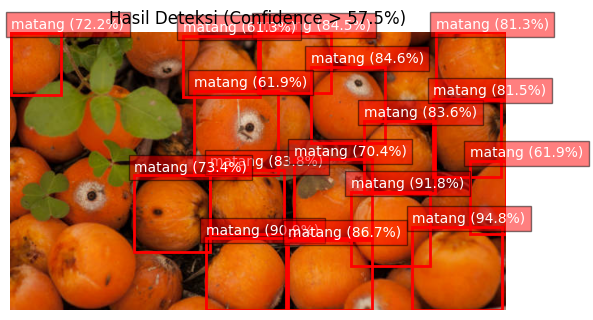

✅ Deteksi: matang (confidence: 94.82%)
✅ Deteksi: matang (confidence: 91.82%)
✅ Deteksi: matang (confidence: 90.90%)
✅ Deteksi: matang (confidence: 86.68%)
✅ Deteksi: matang (confidence: 84.56%)
✅ Deteksi: matang (confidence: 84.49%)
✅ Deteksi: matang (confidence: 83.79%)
✅ Deteksi: matang (confidence: 83.56%)
✅ Deteksi: matang (confidence: 81.54%)
✅ Deteksi: matang (confidence: 81.30%)
✅ Deteksi: matang (confidence: 73.44%)
✅ Deteksi: matang (confidence: 72.23%)
✅ Deteksi: matang (confidence: 70.41%)
✅ Deteksi: matang (confidence: 61.91%)
✅ Deteksi: matang (confidence: 61.85%)
✅ Deteksi: matang (confidence: 61.34%)


In [ ]:
# Proses tiap gambar yang diupload
for filename in uploaded.keys():
    # Jalankan deteksi
    results = model(filename)

    # Ambil prediksi dari hasil deteksi pertama (karena 1 gambar)
    boxes = results[0].boxes

    # Tampilkan gambar asli + bbox
    img = Image.open(filename).convert("RGB")
    plt.imshow(img)
    ax = plt.gca()

    # Filter deteksi dengan confidence > 57.5%
    filtered_detections = []

    # Tampilkan tiap prediksi yang memenuhi threshold
    for i in range(len(boxes)):
        conf = float(boxes.conf[i].cpu().numpy())

        # Hanya proses jika confidence > 57.5%
        if conf > 0.575:  # 57.5% = 0.575
            box = boxes.xyxy[i].cpu().numpy()  # [x1, y1, x2, y2]
            cls_id = int(boxes.cls[i].cpu().numpy())

            label = f"{label_map.get(cls_id, 'Unknown')} ({conf*100:.1f}%)"

            # Gambar kotak
            x1, y1, x2, y2 = box
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 fill=False, color='red', linewidth=2)
            ax.add_patch(rect)
            plt.text(x1, y1 - 5, label, color='white',
                     fontsize=10, bbox=dict(facecolor='red', alpha=0.5))

            # Simpan untuk info teks
            filtered_detections.append((cls_id, conf))

    plt.axis('off')
    plt.title('Hasil Deteksi (Confidence > 57.5%)')
    plt.show()

    # Info teks hanya untuk deteksi yang memenuhi threshold
    if len(filtered_detections) > 0:
        for cls_id, conf in filtered_detections:
            print(f"✅ Deteksi: {label_map[cls_id]} (confidence: {conf*100:.2f}%)")
    else:
        print("❌ Tidak ada objek terdeteksi dengan confidence > 57.5%.")


image 1/1 /content/sedikitbusuk.jpg: 544x960 27 matangs, 2 sangat-busuks, 8.4ms
Speed: 3.7ms preprocess, 8.4ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 960)


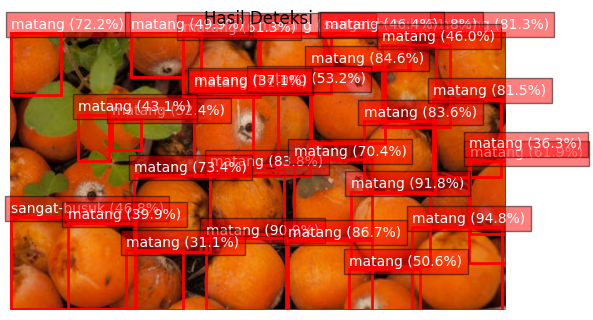

✅ Deteksi: matang (confidence: 94.82%)
✅ Deteksi: matang (confidence: 91.82%)
✅ Deteksi: matang (confidence: 90.90%)
✅ Deteksi: matang (confidence: 86.68%)
✅ Deteksi: matang (confidence: 84.56%)
✅ Deteksi: matang (confidence: 84.49%)
✅ Deteksi: matang (confidence: 83.79%)
✅ Deteksi: matang (confidence: 83.56%)
✅ Deteksi: matang (confidence: 81.54%)
✅ Deteksi: matang (confidence: 81.30%)
✅ Deteksi: matang (confidence: 73.44%)
✅ Deteksi: matang (confidence: 72.23%)
✅ Deteksi: matang (confidence: 70.41%)
✅ Deteksi: matang (confidence: 61.91%)
✅ Deteksi: matang (confidence: 61.85%)
✅ Deteksi: matang (confidence: 61.34%)
✅ Deteksi: matang (confidence: 53.20%)
✅ Deteksi: matang (confidence: 52.44%)
✅ Deteksi: sangat-busuk (confidence: 51.78%)
✅ Deteksi: matang (confidence: 50.57%)
✅ Deteksi: matang (confidence: 49.88%)
✅ Deteksi: sangat-busuk (confidence: 46.75%)
✅ Deteksi: matang (confidence: 46.38%)
✅ Deteksi: matang (confidence: 46.00%)
✅ Deteksi: matang (confidence: 43.14%)
✅ Deteksi: ma

In [ ]:
# Proses tiap gambar yang diupload
for filename in uploaded.keys():
    # Jalankan deteksi
    results = model(filename)

    # Ambil prediksi dari hasil deteksi pertama (karena 1 gambar)
    boxes = results[0].boxes

    # Tampilkan gambar asli + bbox
    img = Image.open(filename).convert("RGB")
    plt.imshow(img)
    ax = plt.gca()

    # Tampilkan tiap prediksi
    for i in range(len(boxes)):
        box = boxes.xyxy[i].cpu().numpy()  # [x1, y1, x2, y2]
        cls_id = int(boxes.cls[i].cpu().numpy())
        conf = float(boxes.conf[i].cpu().numpy())

        label = f"{label_map.get(cls_id, 'Unknown')} ({conf*100:.1f}%)"

        # Gambar kotak
        x1, y1, x2, y2 = box
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1,
                             fill=False, color='red', linewidth=2)
        ax.add_patch(rect)
        plt.text(x1, y1 - 5, label, color='white',
                 fontsize=10, bbox=dict(facecolor='red', alpha=0.5))

    plt.axis('off')
    plt.title('Hasil Deteksi')
    plt.show()

    # Info teks juga ditampilkan
    if len(boxes.cls) > 0:
        for i in range(len(boxes)):
            cls_id = int(boxes.cls[i])
            conf = float(boxes.conf[i])
            print(f"✅ Deteksi: {label_map[cls_id]} (confidence: {conf*100:.2f}%)")
    else:
        print("❌ Tidak ada objek terdeteksi.")